In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,mpld3
import cufflinks as cf
import seaborn as sns
import plotly as plotly
plt.style.use('seaborn')


# Introduction to the Project

In [159]:
data = pd.read_excel('MessiRonaldo.xlsx')

                                           Messi vs Ronaldo  
                                           
                         Who's was the better player while both played in Spain?



There's a great debate among football fans on who's the goat(greatest of all time), Messi or Cristiano Ronaldo? I will compare their Champions League Performance, League Performance and Total Performace starting from 2009/10 to 2017/2018. 
I chose the specific period because Ronaldo moved to Real Madrid in the summer before the 2009/10 season and stayed until 2017/18. Both played in Spain's first division League La Liga and competed in the Champions League. Comparing their performance is easier when they play against the same teams. I wanted to control team and player quality. 


The Champions League is a European club competition between Europe's best clubs and the most prestigious club trophy in Europe. 

Ballon D'or Win: The Ballon d'Or award honours the male player who performed the best over the previous year. 
Journalists vote for the best player. 
I will look at the following:

Liga Goals = Goals scored in the League 
Liga_Asts = Assists given in the League
Liga_Aps = Games played in the League
Liga_Mins= Minutes played in the League
Cl_GOals= Goals scored in the Champions League 
Cl_Asts = Assists given in the Champions League
Cl_Aps= Games played in the Champions League 
Cl_Mins= Minutes Played in the Champions League 

# Cleaning the data and looking for missing values and duplicates

In [166]:
data.sort_values(by='Season',inplace=True)

In [194]:
data["Ballon d'or"]= [0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0]

In [6]:
data.info()
# Check datatypes and make sure all columns have the right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       18 non-null     object
 1   Player       18 non-null     object
 2   Liga_Goals   18 non-null     int64 
 3   Liga_Asts    18 non-null     int64 
 4   Liga_Aps     18 non-null     int64 
 5   Liga_Mins    18 non-null     int64 
 6   CL_Goals     18 non-null     int64 
 7   CL_Asts      18 non-null     int64 
 8   CL_Aps       18 non-null     int64 
 9   CL_Mins      18 non-null     int64 
 10  Ballon d'or  18 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ KB


In [7]:
data.sort_values('Season')

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or
17,2009-10,Ronaldo,26,11,29,2462,7,2,6,450,0
16,2009-10,Messi,34,13,35,2841,8,0,11,985,0
15,2010-11,Ronaldo,40,13,34,2914,6,4,12,1018,0
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,1
13,2011-12,Ronaldo,46,13,38,3353,10,4,10,930,0
12,2011-12,Messi,50,20,37,3270,14,9,11,990,1
11,2012-13,Ronaldo,34,11,34,2716,12,1,12,1080,0
10,2012-13,Messi,46,14,32,2629,8,3,11,827,1
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991,0
8,2013-14,Messi,28,12,31,2498,8,1,7,630,1


In [8]:
# We don't have missing values or duplicates
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [450]:
data.isna().sum()

Season              0
Player              0
Liga_Goals          0
Liga_Asts           0
Liga_Aps            0
Liga_Mins           0
CL_Goals            0
CL_Asts             0
CL_Aps              0
CL_Mins             0
Ballon d'or         0
Champions_League    0
La_Liga             0
G+A_Liga            0
G+A/Games_Liga      0
Total_G+A           0
G+A_Champ           0
dtype: int64

# Computing new calculations to compare Ronaldo's and Messi's Performace from 2009/10 to 2017/18

GPG_Lig:Goals per Game in La Liga
APG_Lig: Assists per Game in La Liga
GPM_Lig: Minutes per Goal(How many minutes do they need to score a goal?) The smaller the number the more efficient the player. 
G+A_Lig: Goals+ Assists in La Liga 
G+A/Games_Lig:  Goals+Assists per Game
G+A/Minutes_Lig: Minutes to score a goal or provide an assist 
APM_Lig: Minutes to provide an assist
La_Liga: zero stands for no win and one stands for win (0 = no win, 1=win)

In [10]:
data['GPG_Lig'] = round(data['Liga_Goals']/data['Liga_Aps'],2)

In [11]:
data['APG_Lig'] = round(data['Liga_Asts']/data['Liga_Aps'],2)

In [12]:
data['GPM_Lig']= round(data['Liga_Mins']/data['Liga_Goals'],2)

In [13]:
data['G+A_Lig'] = data['Liga_Goals']+data['Liga_Asts']

In [14]:
data['G+A/Games_Lig'] = (data['Liga_Goals']+data['Liga_Asts'])/data['Liga_Aps']

In [15]:
data['G+A/Minutes_Lig'] = data['Liga_Mins']/(data['Liga_Goals']+data['Liga_Asts'])

In [17]:
data['APM_Lig'] = round(data['Liga_Mins']/data['Liga_Asts'],2)

In [18]:
data['La_Liga']= [0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1]

In [19]:
Liga= data[['Season','Player','Liga_Goals','Liga_Asts','Liga_Aps','Liga_Mins','GPG_Lig','APG_Lig','GPM_Lig',
            'G+A_Lig','G+A/Games_Lig','G+A/Minutes_Lig','APM_Lig','La_Liga',"Ballon d'or"]]

In [20]:
Liga

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,GPG_Lig,APG_Lig,GPM_Lig,G+A_Lig,G+A/Games_Lig,G+A/Minutes_Lig,APM_Lig,La_Liga,Ballon d'or
17,2009-10,Ronaldo,26,11,29,2462,0.90,0.38,94.69,37,1.275862,66.540541,223.82,0,0
16,2009-10,Messi,34,13,35,2841,0.97,0.37,83.56,47,1.342857,60.446809,218.54,1,0
15,2010-11,Ronaldo,40,13,34,2914,1.18,0.38,72.85,53,1.558824,54.981132,224.15,0,0
14,2010-11,Messi,31,21,33,2862,0.94,0.64,92.32,52,1.575758,55.038462,136.29,1,1
13,2011-12,Ronaldo,46,13,38,3353,1.21,0.34,72.89,59,1.552632,56.830508,257.92,1,0
12,2011-12,Messi,50,20,37,3270,1.35,0.54,65.40,70,1.891892,46.714286,163.50,0,1
11,2012-13,Ronaldo,34,11,34,2716,1.00,0.32,79.88,45,1.323529,60.355556,246.91,0,0
10,2012-13,Messi,46,14,32,2629,1.44,0.44,57.15,60,1.875000,43.816667,187.79,1,1
9,2013-14,Ronaldo,31,11,30,2537,1.03,0.37,81.84,42,1.400000,60.404762,230.64,0,0
8,2013-14,Messi,28,12,31,2498,0.90,0.39,89.21,40,1.290323,62.450000,208.17,0,1


# Performace in La Liga

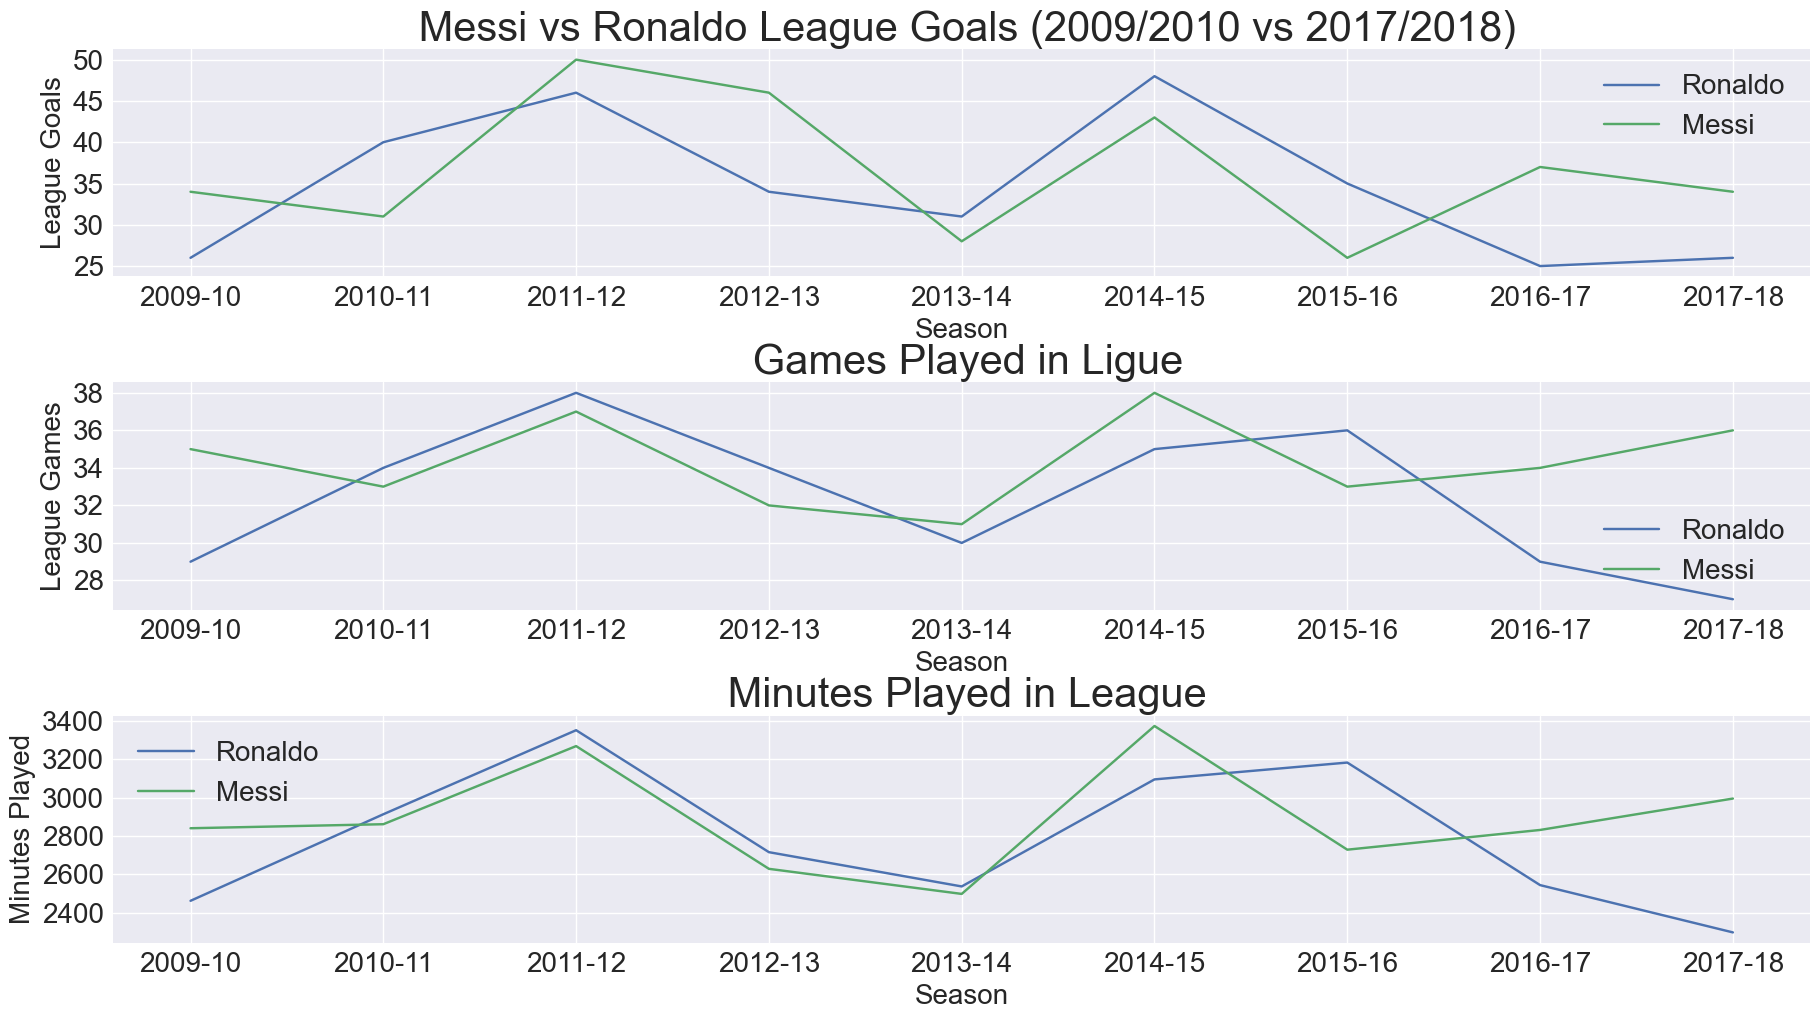

In [454]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
sns.lineplot(x=Liga.Season,y=Liga.Liga_Goals,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Messi vs Ronaldo League Goals (2009/2010 vs 2017/2018)',fontsize=30)
plt.ylabel('League Goals',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(3,1,2)
sns.lineplot(x=Liga.Season,y=Liga.Liga_Aps,hue=Liga.Player)
plt.title(' Games Played in Ligue',fontsize=30)
plt.ylabel('League Games',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)



plt.subplot(3,1,3)
sns.lineplot(x=Liga.Season,y=Liga.Liga_Mins,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Minutes Played in League',fontsize=30)
plt.ylabel('Minutes Played',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout(pad=0)

plt.show()

Between the season 2009/10 to 2017/18, Messi scored more League goals than Ronalod in five seasons. Messi played more Games than Ronaldo in the 5/9 Seasons, which could explain why he scored more goals than Ronaldo. Messi had more playing minutes in  4/9 
seasons. Looking at the Goals per Game ratio should explain better who the more efficient goalscorer is. 

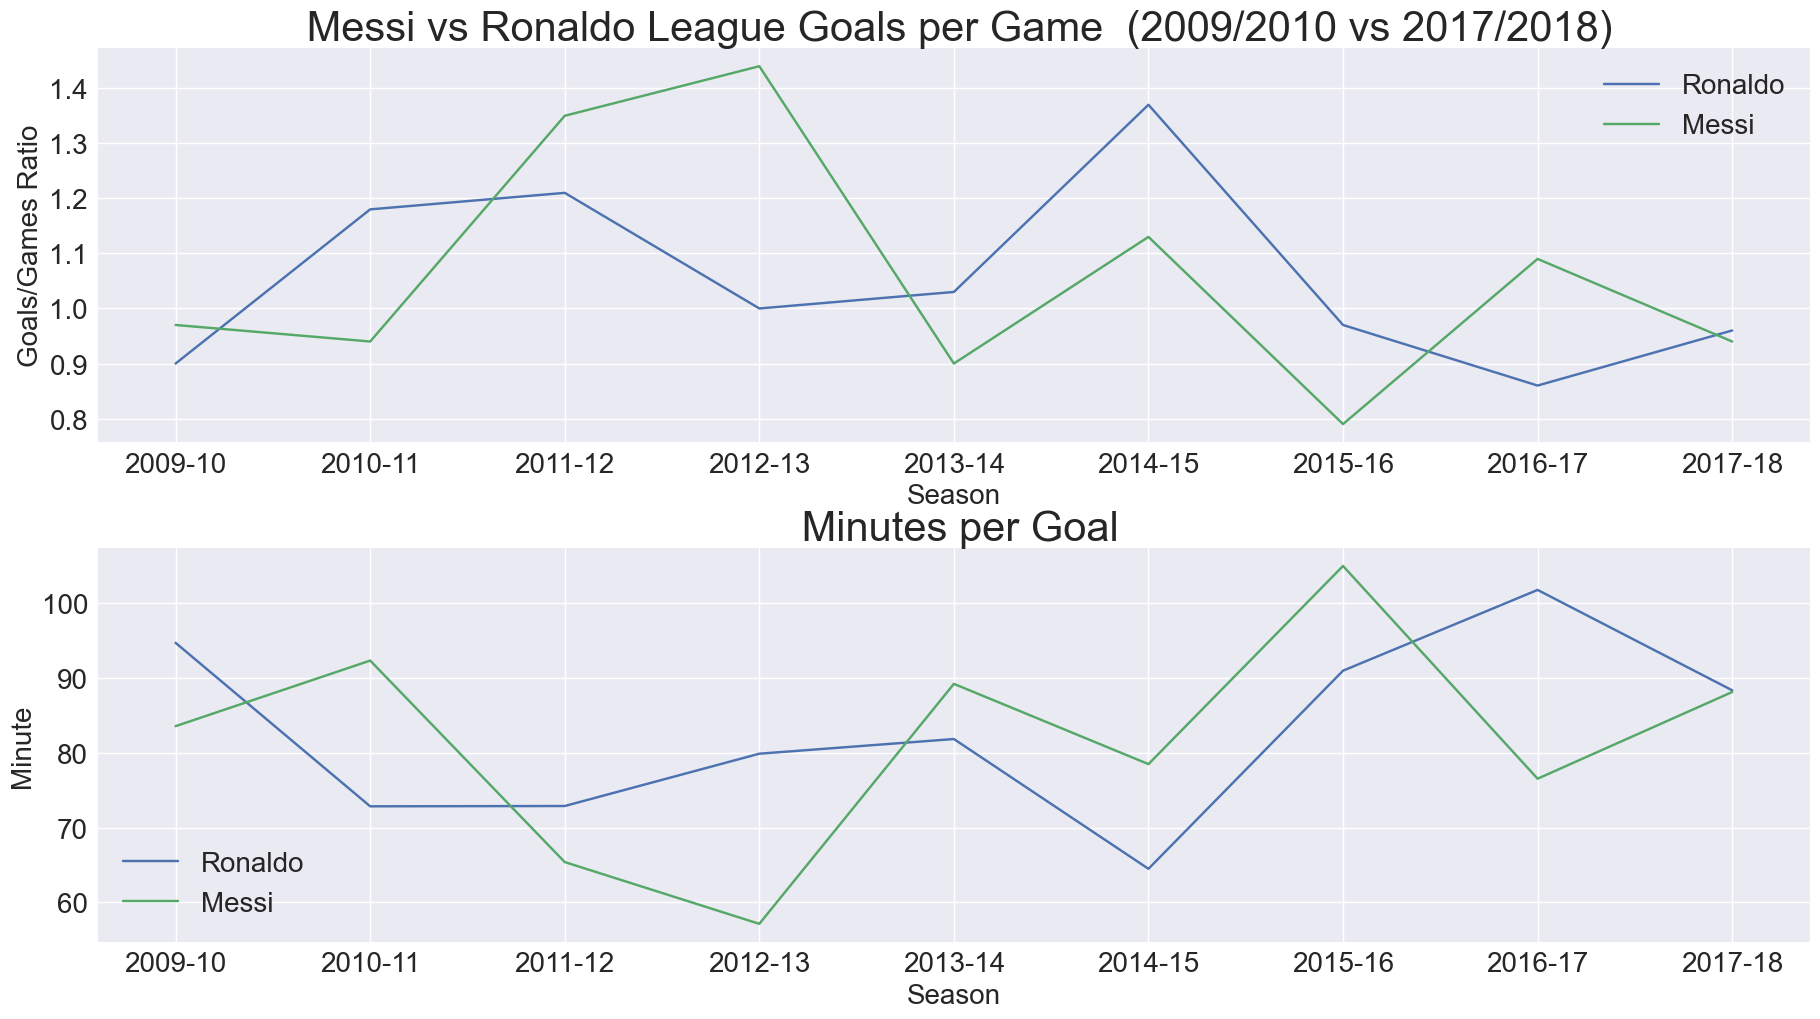

In [495]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
sns.lineplot(x=Liga.Season,y=Liga.GPG_Lig,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Messi vs Ronaldo League Goals per Game  (2009/2010 vs 2017/2018)',fontsize=30)
plt.ylabel('Goals/Games Ratio',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,1,2)
sns.lineplot(x=Liga.Season,y=Liga.GPM_Lig,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Minutes per Goal',fontsize=30)
plt.ylabel('Minute',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout(pad=0)


plt.show()


Goals per Game Ratio: Messi had a better goal-to-game ratio in 4/9 seasons. 
Minutes-to-Goal Ratio:: Messi had a better minute-to-goal ratio in 4/9 seasons and tied once in the last season. 
Minutes needed fewer minutes to score a goal in 4/9 seasons. Messi and Ronaldo have more identical stats when you look at the goal-to-game and Minutes to a goal ratio. The ratio shows which player is a more efficient goalscorer.



Messi is more like a playmaker and provides more assists to his teammates, and Ronaldo is known to be a goalscorer. Let's compare their assists in the League.


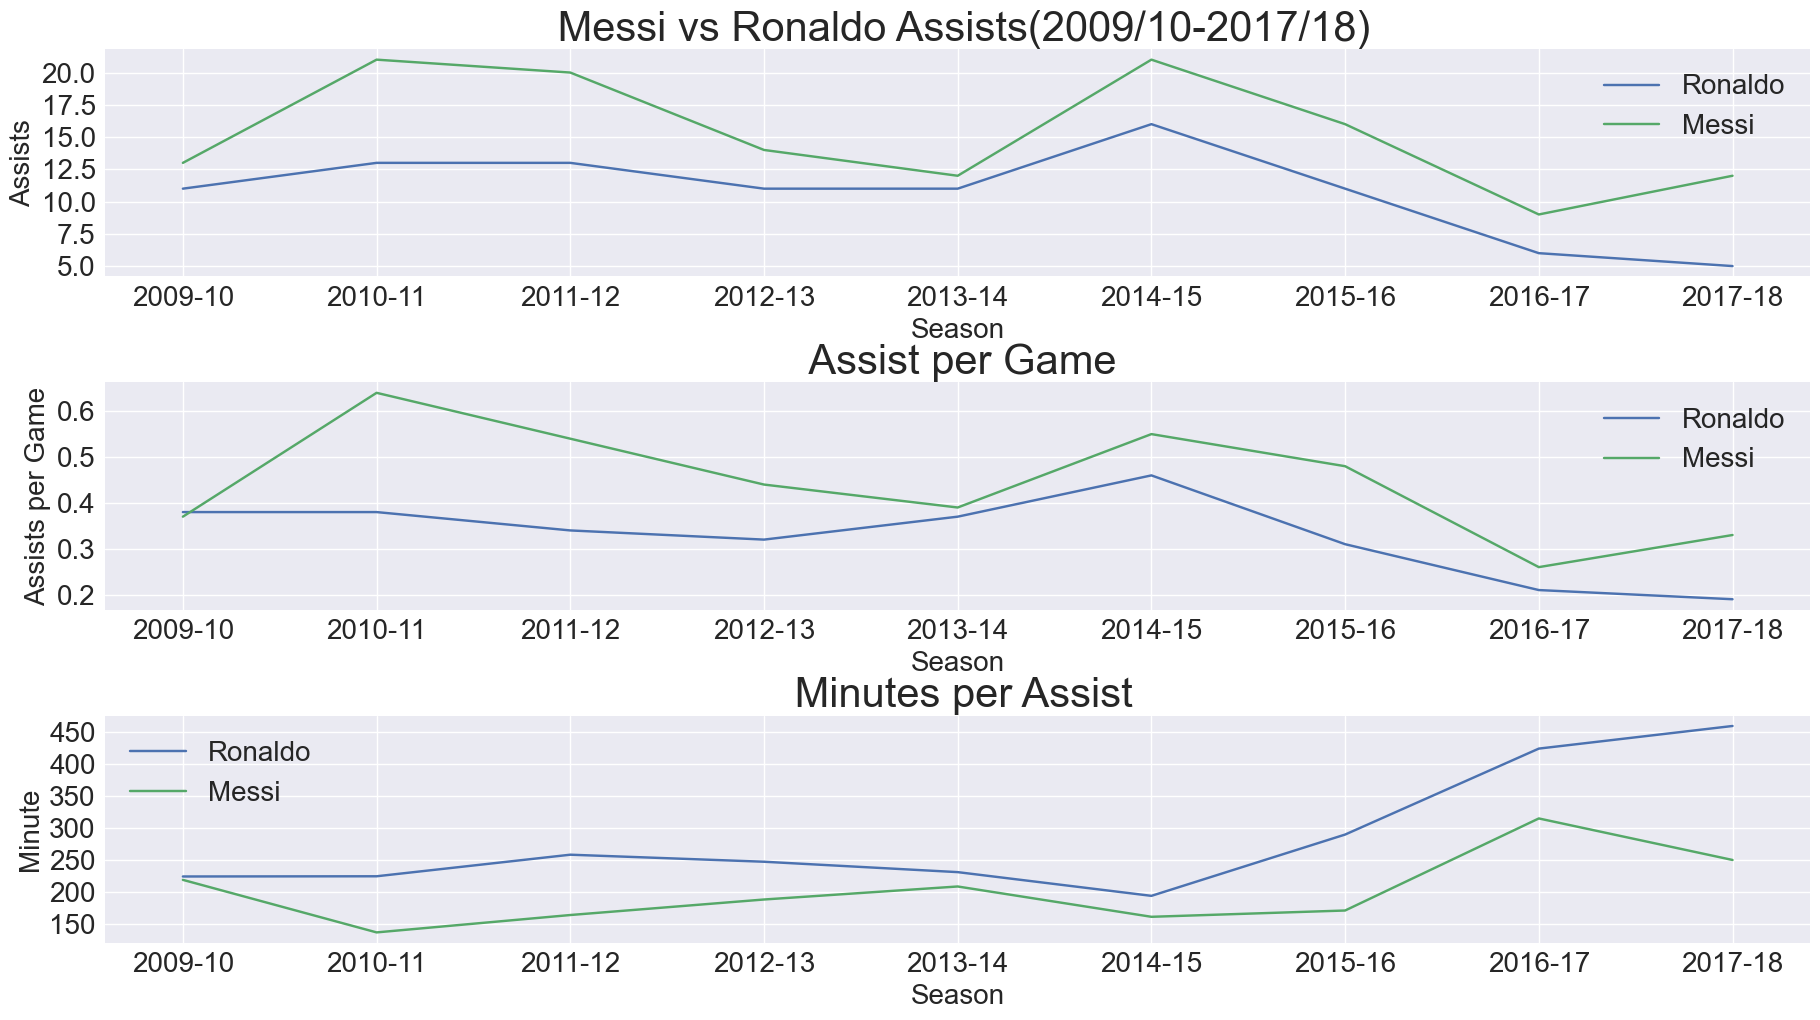

In [494]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
sns.lineplot(x=Liga.Season,y=Liga.Liga_Asts,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Messi vs Ronaldo Assists(2009/10-2017/18)',fontsize=30)
plt.ylabel('Assists',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,2)
sns.lineplot(x=Liga.Season,y=Liga.APG_Lig,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Assist per Game',fontsize=30)
plt.ylabel( 'Assists per Game',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,3)
sns.lineplot(x=Liga.Season,y=Liga.APM_Lig,hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Minutes per Assist',fontsize=30)
plt.ylabel('Minute',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



plt.tight_layout(pad=0)
plt.show()


Assists: Messi provided more Assists than Ronaldo in all nine seasons in La Liga.
Assists per Game: Messi had a better Assist to  Game ratio in 8/9 seasons, and Ronaldo had a slightly better ratio in his first season in Spain. 

Ronaldo's performance in terms of assists tends to be more consistent than Messi's.
Assists per Minute: Messi needed fewer minutes to assist in all nine seasons.

Conclusion: Messi is a more of a playmaker than Ronaldo and a better assist provider overall. 

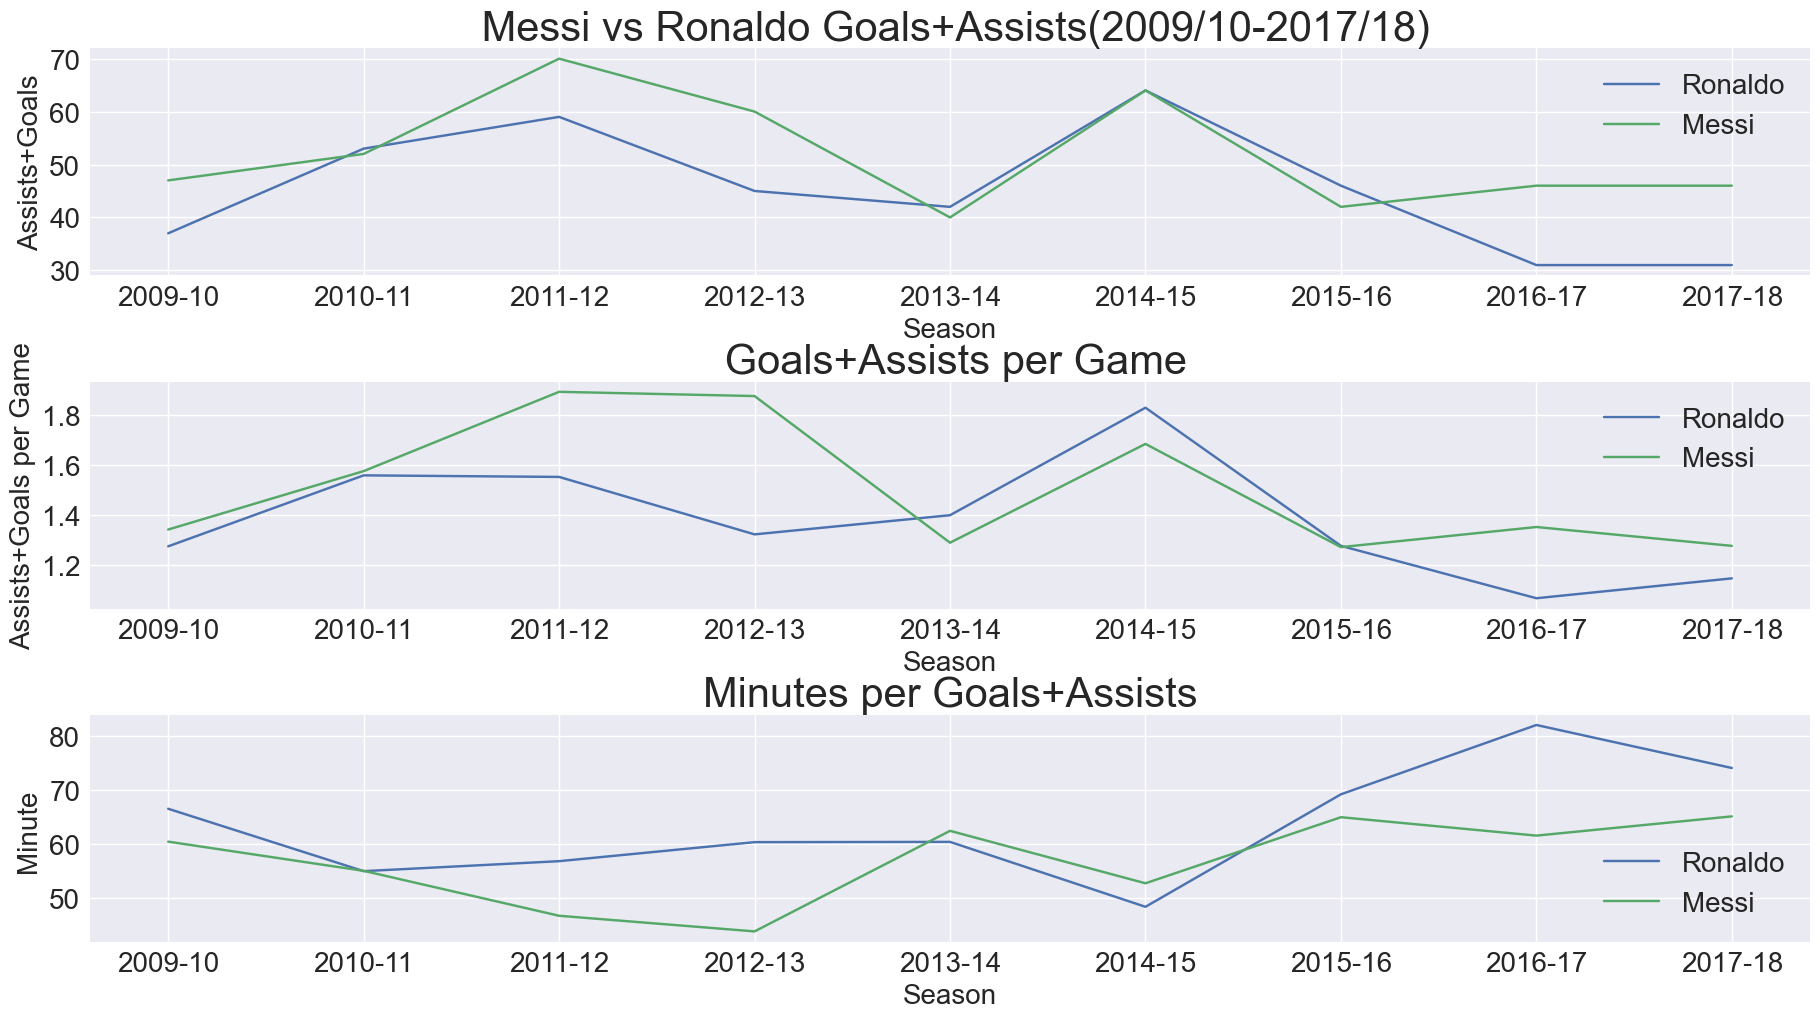

In [496]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
sns.lineplot(x=Liga.Season,y=Liga['G+A_Lig'],hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Messi vs Ronaldo Goals+Assists(2009/10-2017/18)',fontsize=30)
plt.ylabel('Assists+Goals',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,2)
sns.lineplot(x=Liga.Season,y=Liga['G+A/Games_Lig'],hue=Liga.Player)
plt.legend(fontsize=20)
plt.title(' Goals+Assists per Game',fontsize=30)
plt.ylabel( 'Assists+Goals per Game',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,3)
sns.lineplot(x=Liga.Season,y=Liga['G+A/Minutes_Lig'],hue=Liga.Player)
plt.legend(fontsize=20)
plt.title('Minutes per Goals+Assists',fontsize=30)
plt.ylabel( 'Minute ',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



plt.tight_layout(pad=0)
plt.show()

A+G : Messi had more Assist+Goals in 5/9 seasons than Ronaldo and tied once in the seaon 2014/15. 
G+A per Game : Messi had more A+G per Games played in 6/9 seasons and lost by a small number in the season 2015/16.
G+A per Minute Played: Messi needed fewer time to provide an assist+ goal than Ronaldo in 6/9 seaons. 

In [72]:
Scorer_points=data[['Season','Player','Liga_Goals','Liga_Aps','G+A_Lig','La_Liga']]

In [461]:
Liga_Stats = Scorer_points.groupby('Player').sum()

In [462]:
Liga_Stats['Goals/Game']= Liga_Stats.Liga_Goals/Liga_Stats.Liga_Aps
Liga_Stats['G+A/Game']= Liga_Stats['G+A_Lig']/Liga_Stats.Liga_Aps

In [464]:
Liga_Stats

,Liga_Goals,Liga_Aps,G+A_Lig,La_Liga,Goals/Game,G+A/Game,Player
Player,,,,,,,
Messi,329,309,467,6,1.064725,1.511327,Messi
Ronaldo,311,292,408,2,1.065068,1.397260,Ronaldo


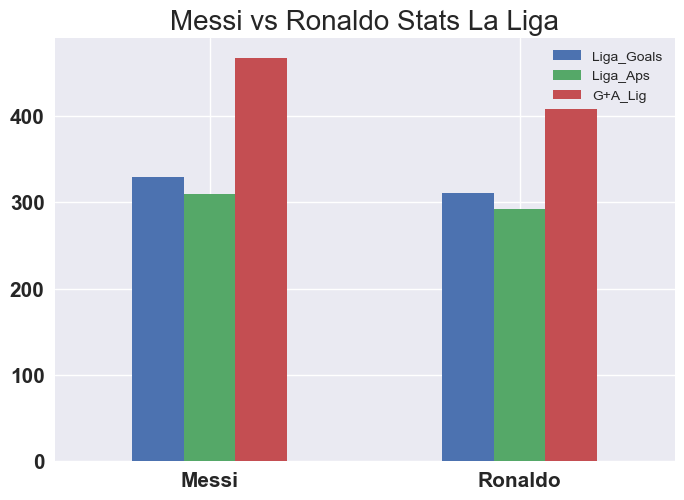

In [498]:
Liga_Stats.iloc[:,0:3].plot(kind='bar')
plt.title('Messi vs Ronaldo Stats La Liga',fontsize=20)
plt.ylabel('')
plt.xlabel('')
plt.xticks(weight='bold',fontsize=15,rotation=0)
plt.yticks(weight='bold',fontsize=15)
plt.show()

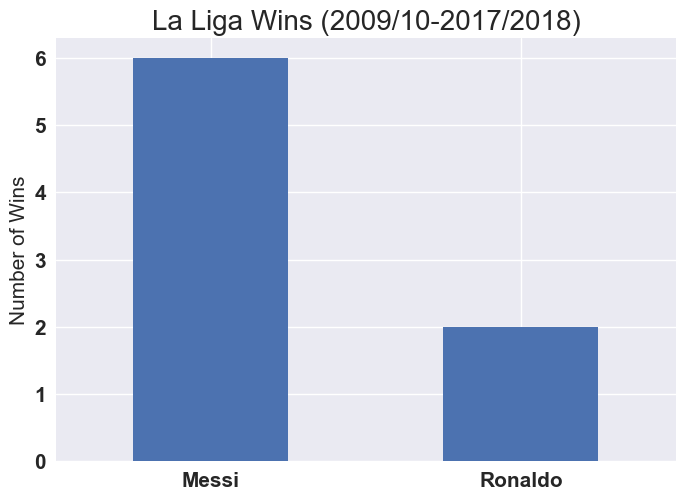

In [129]:
Liga_Stats.iloc[:,3].plot.bar()
plt.title('La Liga Wins (2009/10-2017/2018)',fontsize=20)
plt.ylabel('Number of Wins',fontsize=15)
plt.xlabel('')
plt.xticks(weight='bold',fontsize=15,rotation=0)
plt.yticks(weight='bold',fontsize=15)

plt.show()

Overall, Messi outperformed Ronaldo based on the number of titles won with FC Barcelona, goals scored, matches played, and assists provided during Ronaldo's career in Spain. He won La Liga six times, while Ronaldo won it with Real Madrid only twice. 

Messi and Ronaldo are almost identical in terms of goals, assists provided, and games played. 
Ronaldo and Messi had nearly identical Total Goal to Game ratio and Total Goals+Assists to Game ratio while both played in Spain.  
Messi had 59 more scorer points than Ronaldo, which is a good amount of difference.

In conclusion, we could assume that Messi scored more decisive goals in the League or that he had a better team, which is why he won more La Liga titles than Ronaldo. Still, we need to dig deeper and look at some other stats before drawing a full conclusion. Having a better team makes it easier to score and provide assists. 
Based on the identical stats Messi and Ronaldo delivered, Messi must have a better team, or otherwise, Ronaldo would've won more than 2 League titles in nine seasons. 


# Performance in the Champions League

In [198]:
Champions = data[['Season','Player','CL_Goals','CL_Asts','CL_Aps','CL_Mins',"Ballon d'or"]]

In [212]:
Champions['Champions_League']= [0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0]
Champions
# 0 = No win  1 = Win in the Champions League

,Season,Player,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,CL_Goal/Game,CL_Goal/Minute,CL_Asts/Game,Minutes/CL_Asts,CL_G+A,CL_G+A/Games,Mins/CL_G+A
17,2009-10,Ronaldo,7,2,6,450,0,0,1.166667,64.285714,0.333333,225.000000,9,1.500000,50.000000
16,2009-10,Messi,8,0,11,985,1,0,0.727273,123.125000,0.000000,inf,8,0.727273,123.125000
15,2010-11,Ronaldo,6,4,12,1018,0,0,0.500000,169.666667,0.333333,254.500000,10,0.833333,101.800000
14,2010-11,Messi,12,4,13,1050,1,1,0.923077,87.500000,0.307692,262.500000,16,1.230769,65.625000
13,2011-12,Ronaldo,10,4,10,930,0,0,1.000000,93.000000,0.400000,232.500000,14,1.400000,66.428571
12,2011-12,Messi,14,9,11,990,1,0,1.272727,70.714286,0.818182,110.000000,23,2.090909,43.043478
11,2012-13,Ronaldo,12,1,12,1080,1,0,1.000000,90.000000,0.083333,1080.000000,13,1.083333,83.076923
10,2012-13,Messi,8,3,11,827,0,0,0.727273,103.375000,0.272727,275.666667,11,1.000000,75.181818
8,2013-14,Messi,8,1,7,630,0,0,1.142857,78.750000,0.142857,630.000000,9,1.285714,70.000000
9,2013-14,Ronaldo,17,6,11,991,1,1,1.545455,58.294118,0.545455,165.166667,23,2.090909,43.086957


In [465]:
Champions['CL_Goal/Game']= Champions['CL_Goals']/Champions['CL_Aps']
Champions['CL_Goal/Minute']=Champions['CL_Mins']/Champions['CL_Goals']
Champions['CL_Asts/Game']=(Champions['CL_Asts']/Champions['CL_Aps'])
Champions['Minutes/CL_Asts']=Champions['CL_Mins']/Champions['CL_Asts']
Champions['CL_G+A']= Champions['CL_Goals']+Champions['CL_Asts']
Champions['CL_G+A/Games']=(Champions['CL_Goals']+Champions['CL_Asts'])/Champions['CL_Aps']
Champions['Mins/CL_G+A']= Champions['CL_Mins']/(Champions['CL_Goals']+Champions['CL_Asts'])

CL_Goal/Game: Champions League Goals per Game.  
CL_Goal/Minute: Minutes needed to score Champions League Goals.
CL_Asts/Game: Champions League Assist per Game.
Minutes/CL_Asts: Minutes needed to assist in the Champions League.
CL_G+A: Champions League Goals + Assist. 
CL_G+A/Games: Champions League Goals+Assist per Game. 
Mins/CL_G+A: Minutes needed to assist or score a goal in the Champions League. 


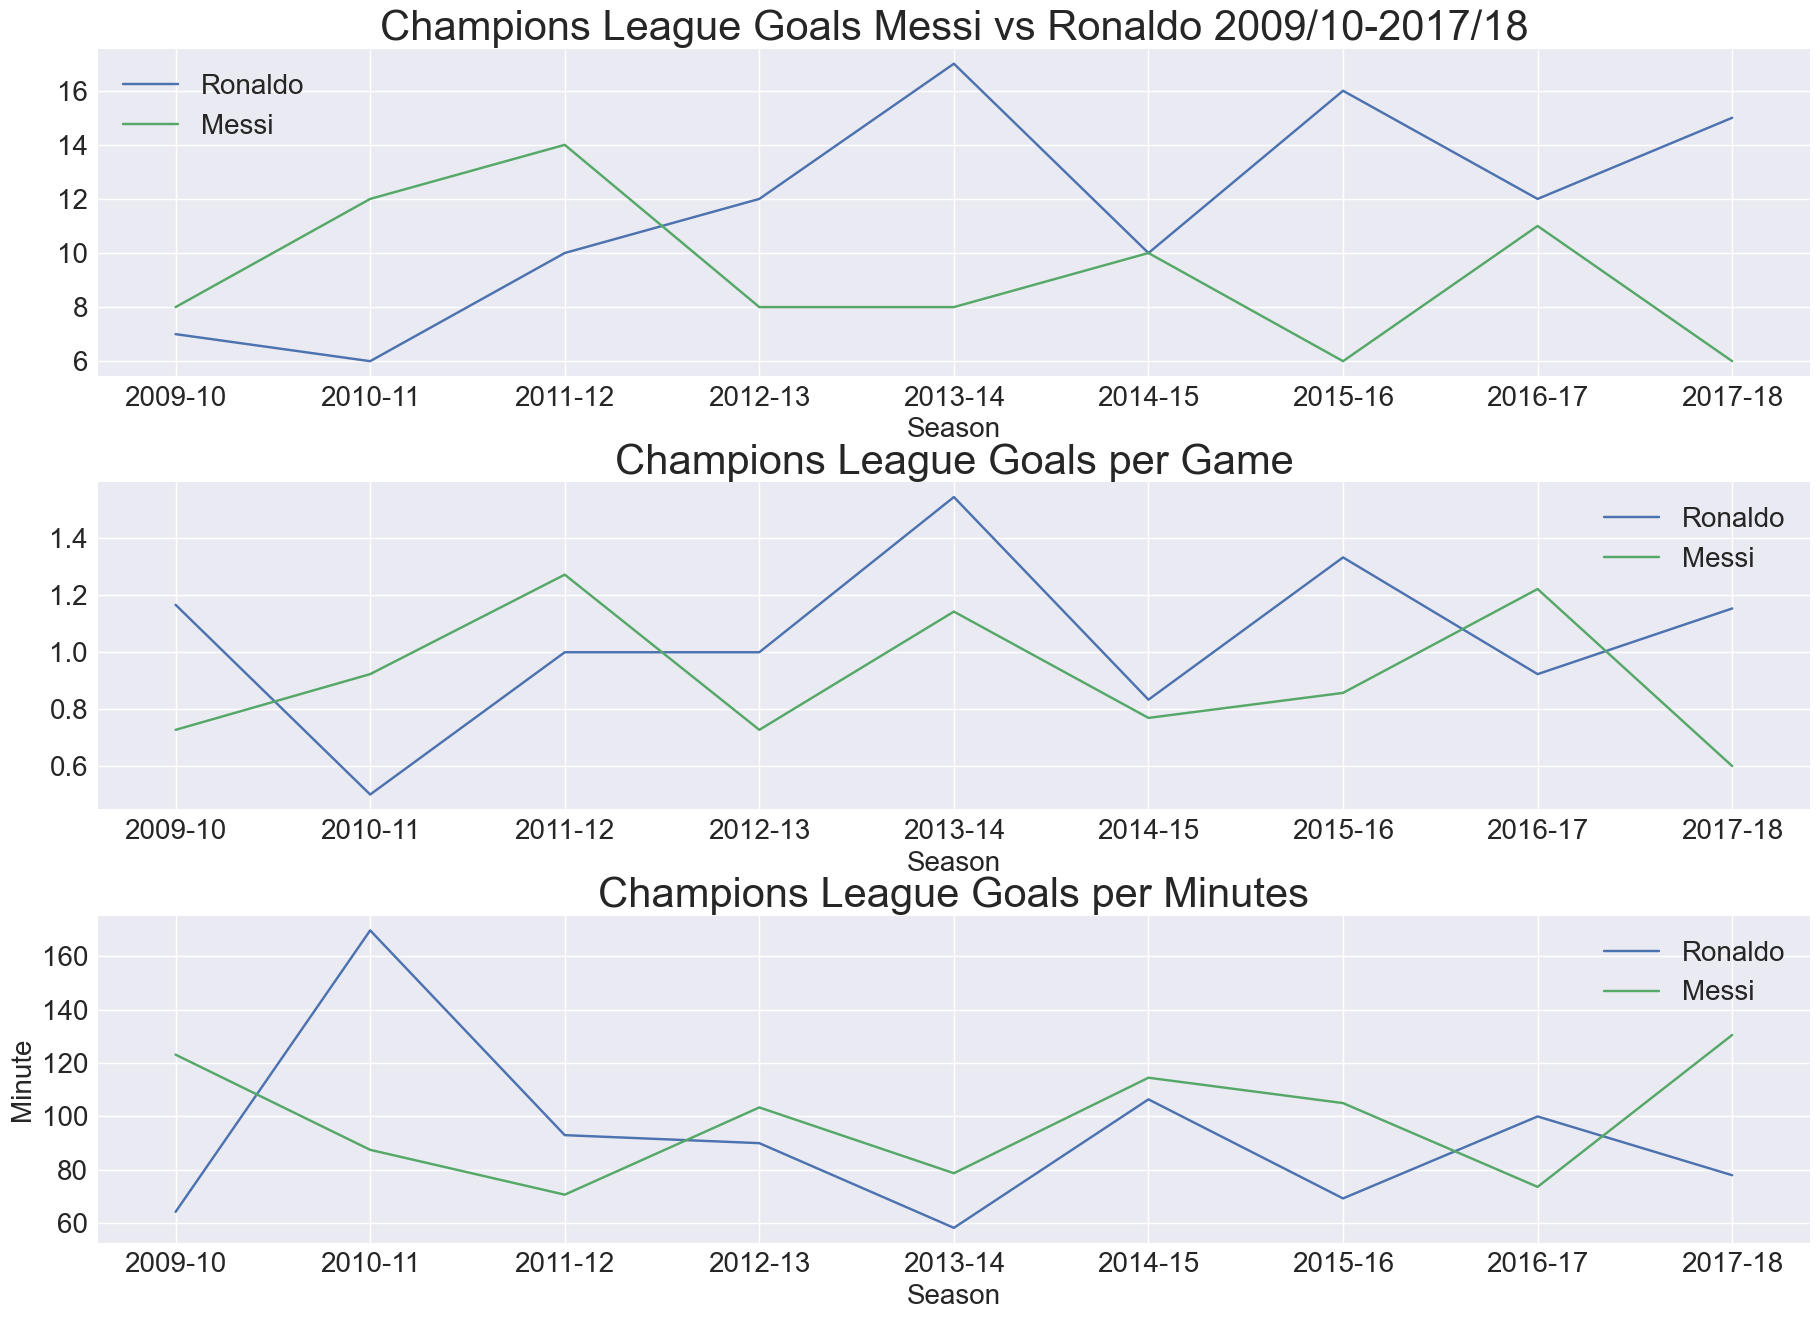

In [499]:
plt.figure(figsize=(18,13))

plt.subplot(3,1,1)
sns.lineplot(x=Champions.Season,y=Champions.CL_Goals,hue=Champions.Player)
plt.title('Champions League Goals Messi vs Ronaldo 2009/10-2017/18',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,2)
sns.lineplot(x=Champions.Season,y=Champions['CL_Goal/Game'],hue=Champions.Player)
plt.title('Champions League Goals per Game',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,3)
sns.lineplot(x=Champions.Season,y=Champions['CL_Goal/Minute'],hue=Champions.Player)
plt.title('Champions League Goals per Minutes',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Minute',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


plt.tight_layout(pad=0)
plt.show()

Champions League Goals: Ronaldo had more Goals in the Champions League in 5/9 seasons and drew with Messi in 2014/15. 

Champions League Goals per Game ratio: Ronaldo had a better Goal to Game Ratio in 6/9 seasons.

Champions Goals per Minute: Ronaldo needed fewer Minutes to score a goal in 6/9 seasons in the Champions League. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


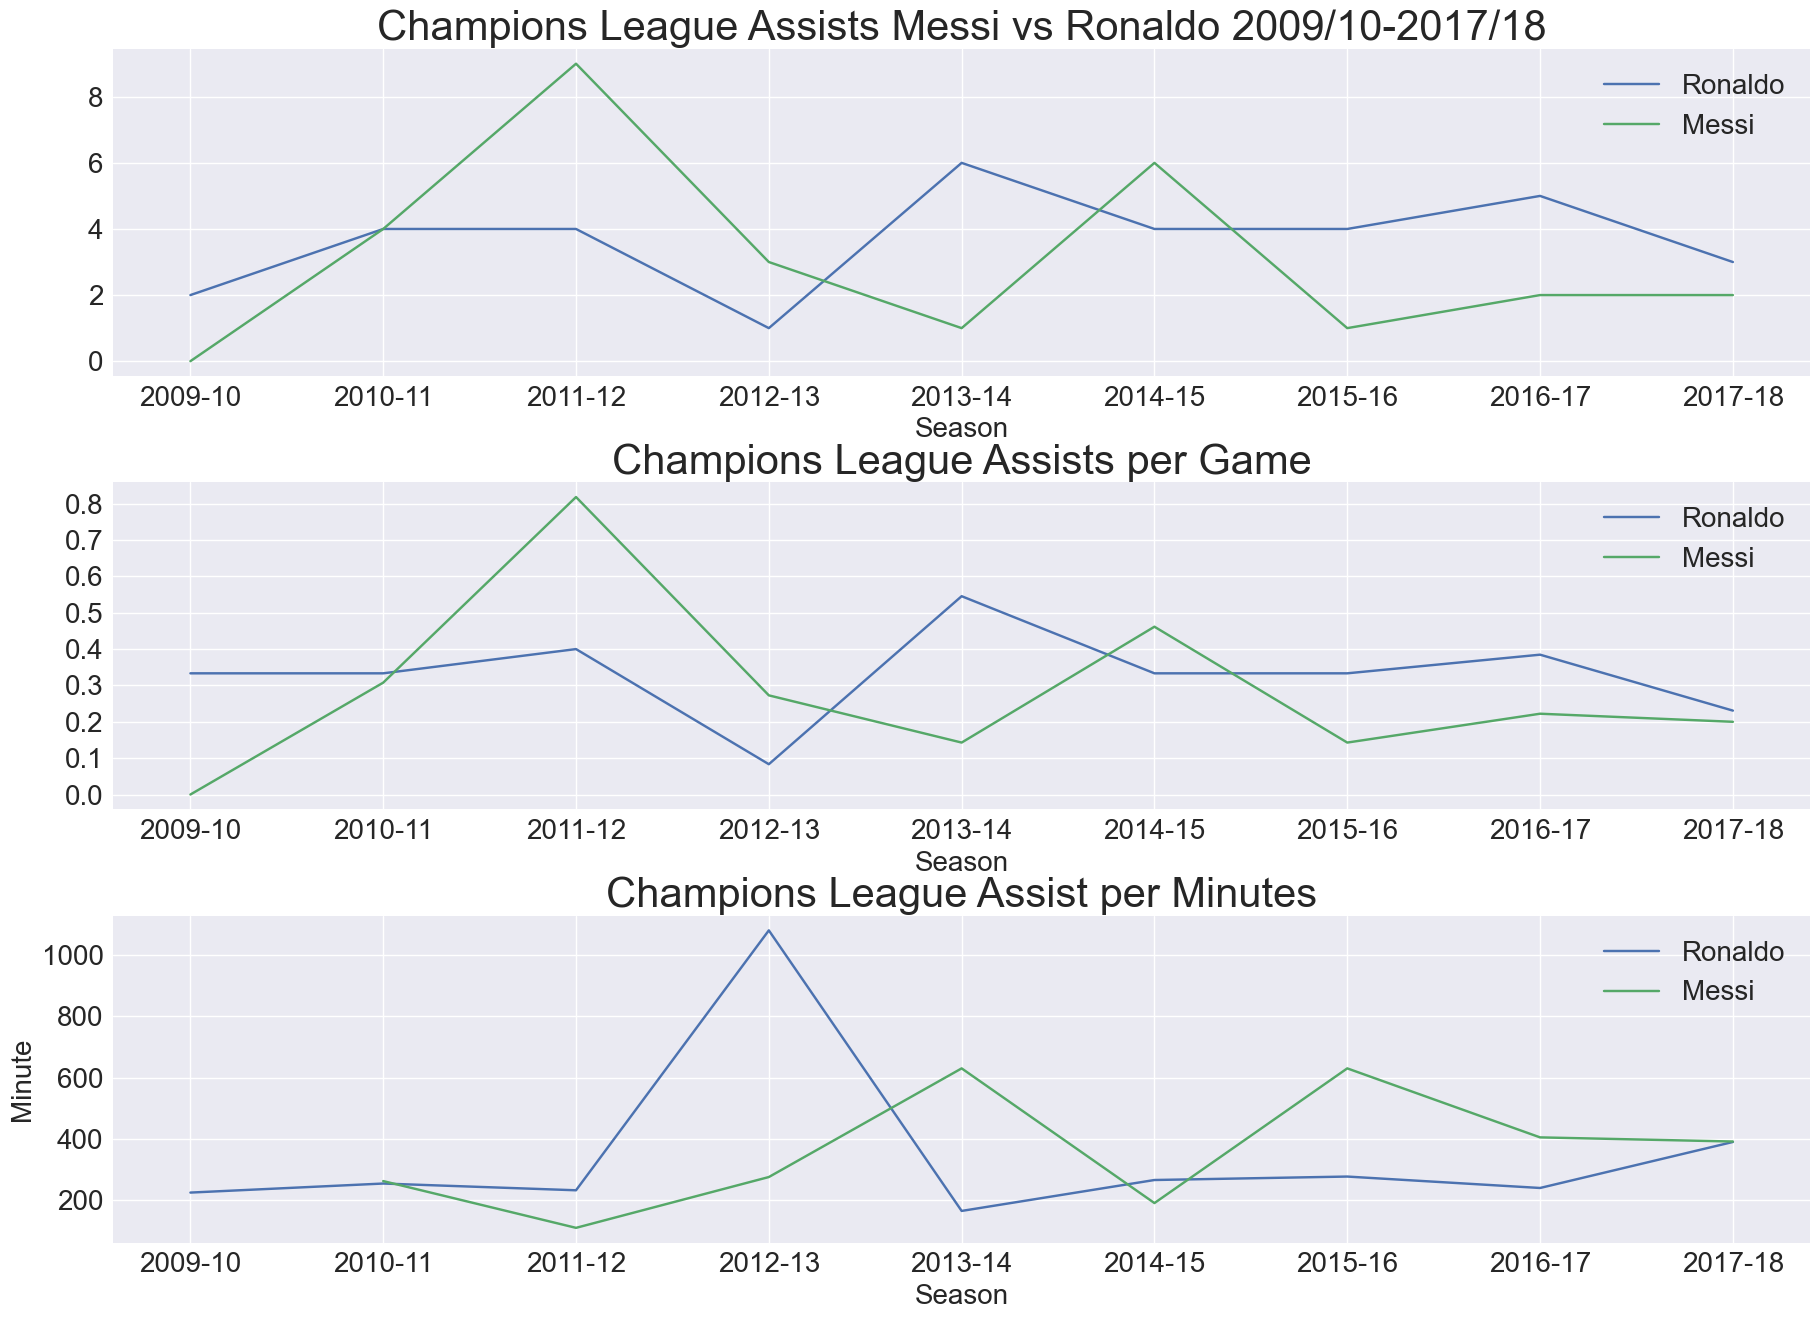

In [500]:
plt.figure(figsize=(18,13))
plt.legend(fontsize=20)

plt.subplot(3,1,1)
sns.lineplot(x=Champions.Season,y=Champions.CL_Asts,hue=Champions.Player)
plt.title('Champions League Assists Messi vs Ronaldo 2009/10-2017/18',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('',)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,2)
sns.lineplot(x=Champions.Season,y=Champions['CL_Asts/Game'],hue=Champions.Player)
plt.title('Champions League Assists per Game',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,3)
sns.lineplot(x=Champions.Season,y=Champions['Minutes/CL_Asts'],hue=Champions.Player)
plt.title('Champions League Assist per Minutes',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Minute',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


plt.tight_layout(pad=0)
plt.show()

Champions League Assists: Ronaldo provided more assists in 5/9 seasons and tied in the 2010/11 season.

Champions League Assists per Game: Ronaldo provided more assists per Game in 5/9 seasons. 

Champions League Assists per Minute: Ronaldo needed less time to assist a teammate in 6/9 seasons.

In [467]:
Champions

,Season,Player,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,CL_Goal/Game,CL_Goal/Minute,CL_Asts/Game,Minutes/CL_Asts,CL_G+A,CL_G+A/Games,Mins/CL_G+A
17,2009-10,Ronaldo,7,2,6,450,0,0,1.166667,64.285714,0.333333,225.000000,9,1.500000,50.000000
16,2009-10,Messi,8,0,11,985,1,0,0.727273,123.125000,0.000000,inf,8,0.727273,123.125000
15,2010-11,Ronaldo,6,4,12,1018,0,0,0.500000,169.666667,0.333333,254.500000,10,0.833333,101.800000
14,2010-11,Messi,12,4,13,1050,1,1,0.923077,87.500000,0.307692,262.500000,16,1.230769,65.625000
13,2011-12,Ronaldo,10,4,10,930,0,0,1.000000,93.000000,0.400000,232.500000,14,1.400000,66.428571
12,2011-12,Messi,14,9,11,990,1,0,1.272727,70.714286,0.818182,110.000000,23,2.090909,43.043478
11,2012-13,Ronaldo,12,1,12,1080,1,0,1.000000,90.000000,0.083333,1080.000000,13,1.083333,83.076923
10,2012-13,Messi,8,3,11,827,0,0,0.727273,103.375000,0.272727,275.666667,11,1.000000,75.181818
8,2013-14,Messi,8,1,7,630,0,0,1.142857,78.750000,0.142857,630.000000,9,1.285714,70.000000
9,2013-14,Ronaldo,17,6,11,991,1,1,1.545455,58.294118,0.545455,165.166667,23,2.090909,43.086957


In [217]:
Champions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 17 to 0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            18 non-null     object 
 1   Player            18 non-null     object 
 2   CL_Goals          18 non-null     int64  
 3   CL_Asts           18 non-null     int64  
 4   CL_Aps            18 non-null     int64  
 5   CL_Mins           18 non-null     int64  
 6   Ballon d'or       18 non-null     int64  
 7   Champions_League  18 non-null     int64  
 8   CL_Goal/Game      18 non-null     float64
 9   CL_Goal/Minute    18 non-null     float64
 10  CL_Asts/Game      18 non-null     float64
 11  Minutes/CL_Asts   18 non-null     float64
 12  CL_G+A            18 non-null     int64  
 13  CL_G+A/Games      18 non-null     float64
 14  Mins/CL_G+A       18 non-null     float64
dtypes: float64(6), int64(7), object(2)
memory usage: 2.8+ KB


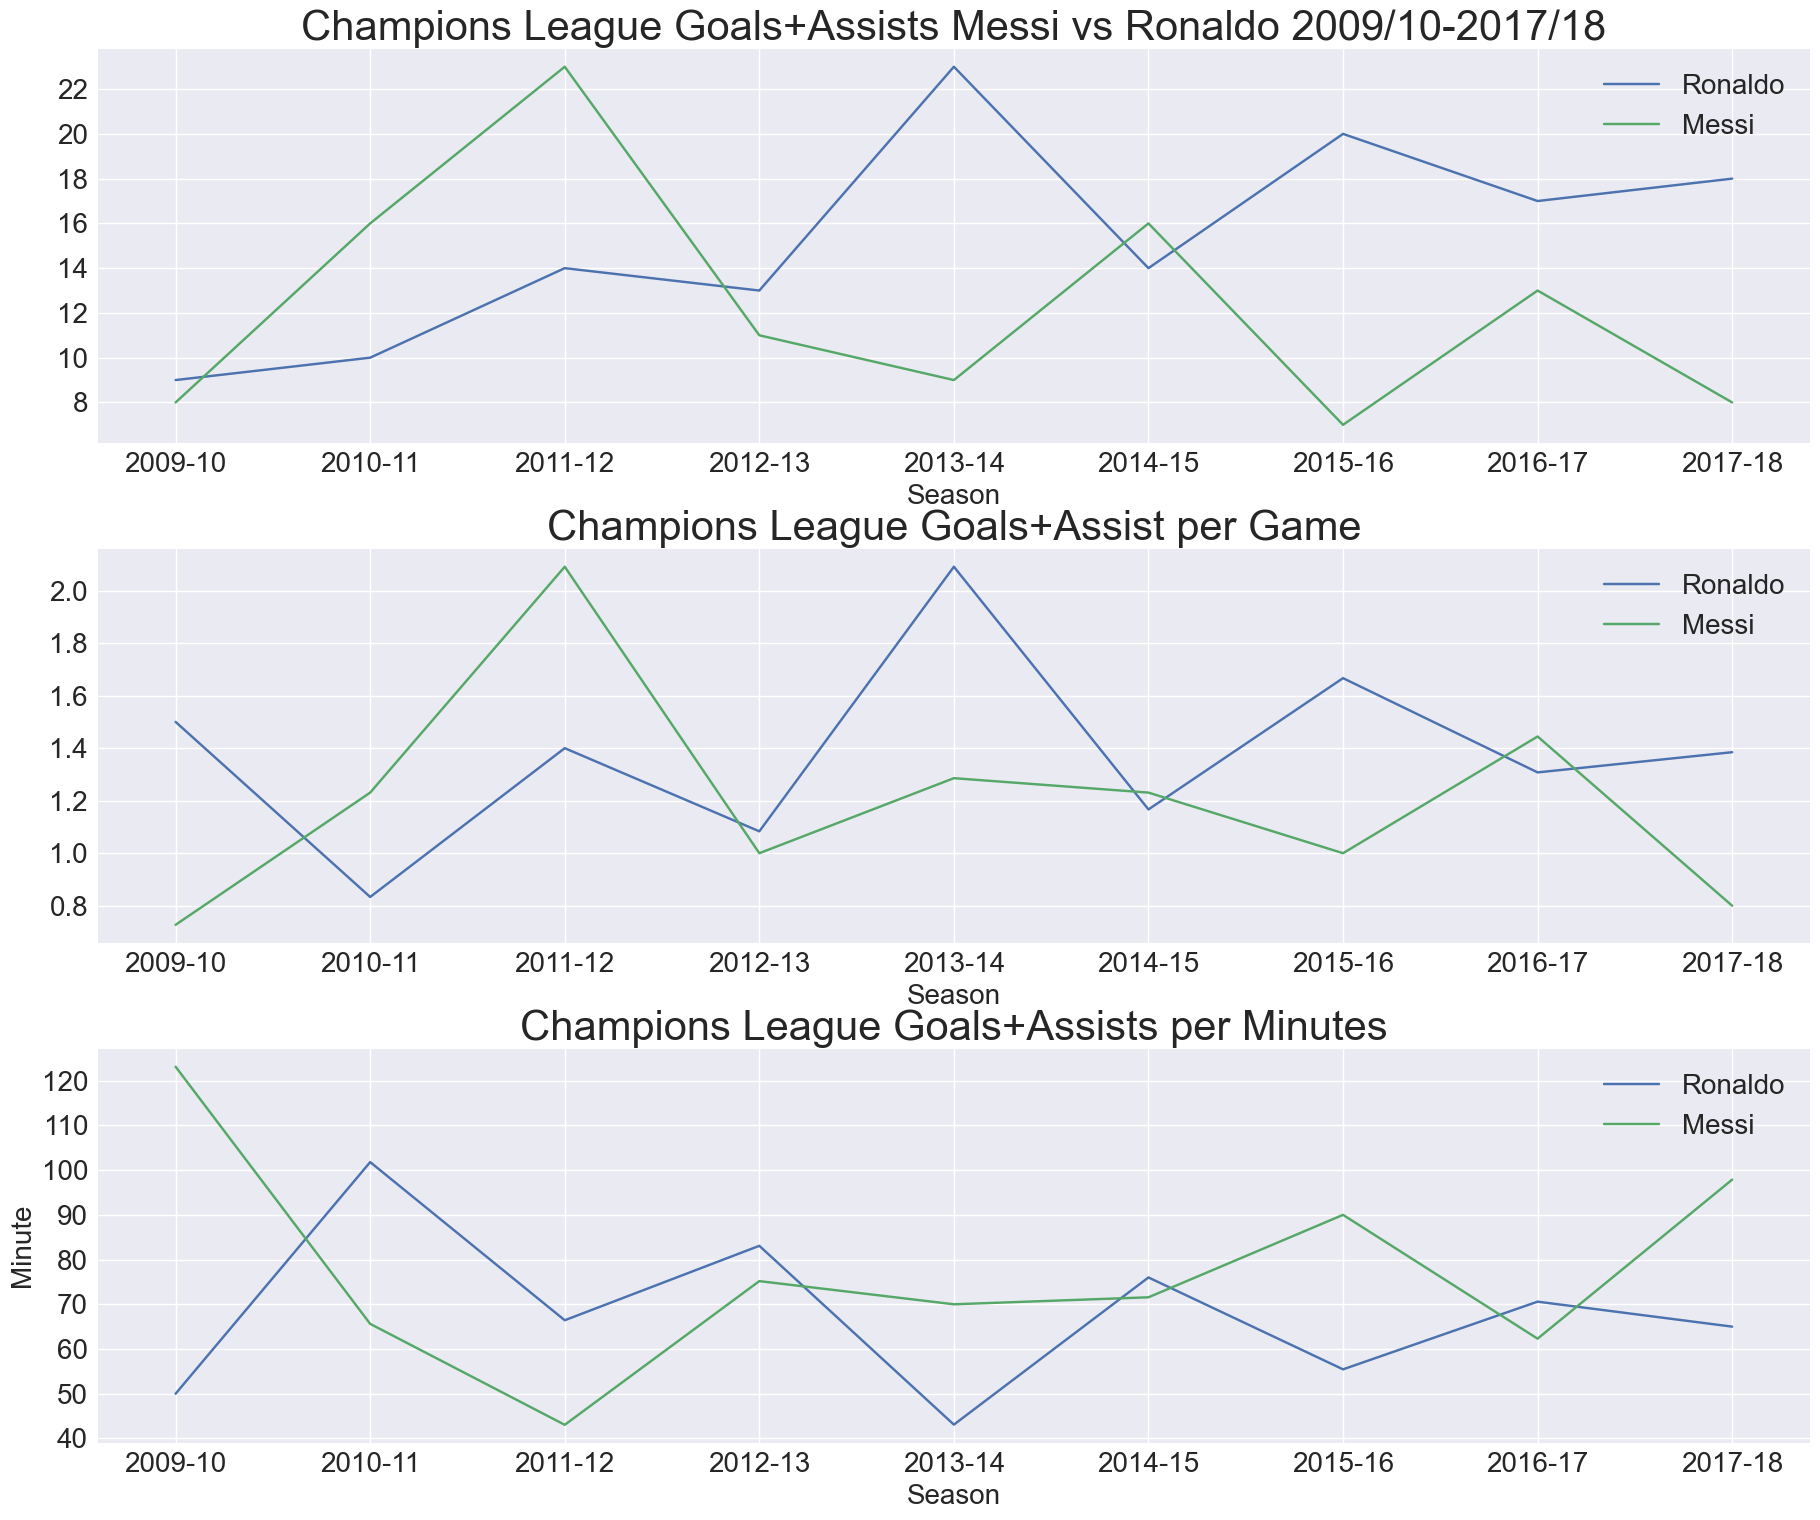

In [502]:
plt.figure(figsize=(18,15))


plt.subplot(3,1,1)
sns.lineplot(x=Champions.Season,y=Champions['CL_G+A'],hue=Champions.Player)
plt.title('Champions League Goals+Assists Messi vs Ronaldo 2009/10-2017/18',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,2)
sns.lineplot(x=Champions.Season,y=Champions['CL_G+A/Games'],hue=Champions.Player)
plt.title('Champions League Goals+Assist per Game',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,1,3)
sns.lineplot(x=Champions.Season,y=Champions['Mins/CL_G+A'],hue=Champions.Player)
plt.title('Champions League Goals+Assists per Minutes',fontsize=30)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Minute',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


plt.tight_layout(pad=0)
plt.show()

Champions League Goals+Assists = Ronaldo had more scoring points in 6/9 seasons in the Champions League.
Champions League Goals+Assists per Game: Ronaldo had a higher Goals+Assist per Game ratio in 5/9 seasons.

Champions League Goals+Assists per Minute Played:  Messi needed fewer minutes to score or assist in 5/9 seasons.
At least in this category in the Champions League, Messi is more efficient than Ronaldo.

In [221]:
Player=Player.groupby('Player').sum()[['CL_Goals','CL_Asts','CL_Aps','Champions_League',
                                                     "Ballon d'or"]]
Player['Cl_Goals/Game']= Player['CL_Goals']/Player['CL_Aps']
Player['Cl_Asts/Game']= Player['CL_Asts']/Player['CL_Aps']
Player['Cl_G+A/Game']= (Player['CL_Goals']+Player['CL_Asts'])/Player['CL_Aps']

In [222]:
Player

,CL_Goals,CL_Asts,CL_Aps,Champions_League,Ballon d'or,Cl_Goals/Game,Cl_Asts/Game,Cl_G+A/Game
Player,,,,,,,,
Messi,83,28,92,2,4,0.902174,0.304348,1.206522
Ronaldo,105,33,101,4,4,1.039604,0.326733,1.366337


Ronaldo scored a total of 105 goals and provided 33 Assists in 101. He won the Champions League four times and four times the Ballon d'Or during his spell in Spain.


<Figure size 2000x1000 with 0 Axes>

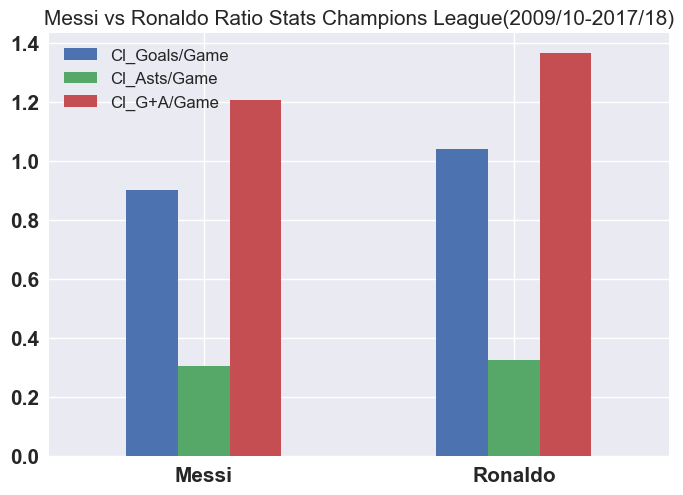

In [504]:
plt.figure(figsize=(20,10))
Player.iloc[:,-3:].plot.bar()
plt.title('Messi vs Ronaldo Ratio Stats Champions League(2009/10-2017/18)',fontsize=15)
plt.ylabel('')
plt.xlabel('')
plt.xticks(weight='bold',fontsize=15,rotation=0)
plt.yticks(weight='bold',fontsize=15)
plt.legend(fontsize=12,loc='upper left')


plt.show()

Ronaldo is the more efficient player in the Champions League. He scored more goals per Game, assisted more per game and had a better G+A per Game ratio than Messi.

<Figure size 2000x1000 with 0 Axes>

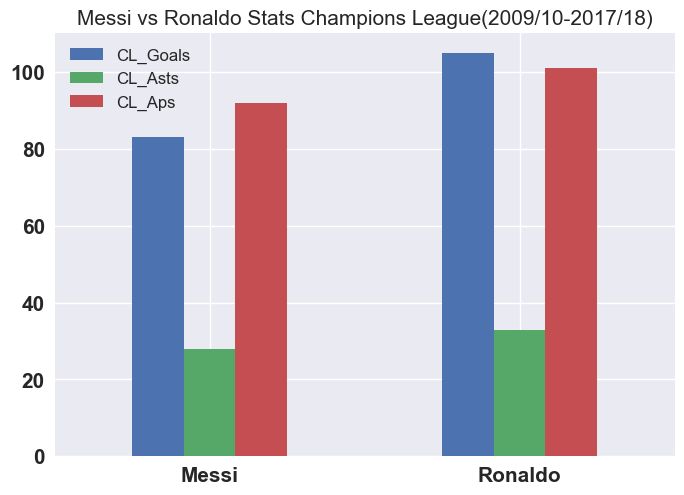

In [506]:
plt.figure(figsize=(20,10))
Player.iloc[:,0:3].plot.bar()
plt.title('Messi vs Ronaldo Stats Champions League(2009/10-2017/18)',fontsize=15)
plt.ylabel('')
plt.xlabel('')
plt.xticks(weight='bold',fontsize=15,rotation=0)
plt.yticks(weight='bold',fontsize=15)
plt.legend(fontsize=12,loc='upper left')


plt.show()

Ronaldo scored more goals, provided more assists and played more games.

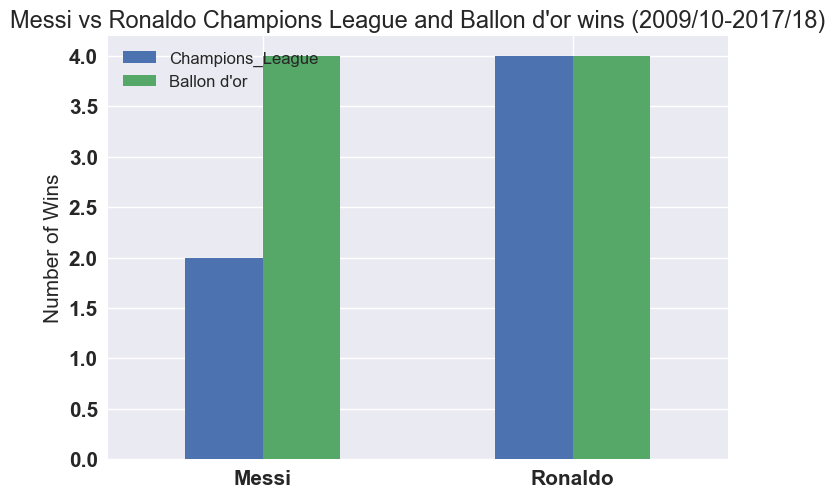

In [472]:
Player.iloc[:,3:5].plot.bar()
plt.title("Messi vs Ronaldo Champions League and Ballon d'or wins (2009/10-2017/18)",fontsize=17)
plt.ylabel('Number of Wins',fontsize=15)
plt.xlabel('')
plt.xticks(weight='bold',fontsize=15,rotation=0)
plt.yticks(weight='bold',fontsize=15)
plt.legend(fontsize=12,loc='upper left')


plt.show()


Ronaldo won 4 Champions League Titles and 4 Ballon d'Or during his spell at Real Madrid. Messi won the Champions League twice and the Ballon d'Or 4 in the same period. 
Based on the data, Ronaldo was better than Messi in the Champions League during his nine-year spell in Spain.
He scored more goals, provided more assists and won the Champions League twice more than Messi in that period.

# Other Stats 

In [254]:
data['Champions_League']= [0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0]
data['La_Liga']= [0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1]

In [258]:
Stats = data
Stats['G+A_Liga']= Stats.Liga_Goals+Stats.Liga_Asts
Stats['G+A/Games_Liga']=(Stats.Liga_Goals+Stats.Liga_Asts)/Stats.Liga_Aps

In [260]:
Stats

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,La_Liga,G+A_Liga,G+A/Games_Liga
17,2009-10,Ronaldo,26,11,29,2462,7,2,6,450,0,0,0,37,1.275862
16,2009-10,Messi,34,13,35,2841,8,0,11,985,1,0,1,47,1.342857
15,2010-11,Ronaldo,40,13,34,2914,6,4,12,1018,0,0,0,53,1.558824
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,1,1,1,52,1.575758
13,2011-12,Ronaldo,46,13,38,3353,10,4,10,930,0,0,1,59,1.552632
12,2011-12,Messi,50,20,37,3270,14,9,11,990,1,0,0,70,1.891892
11,2012-13,Ronaldo,34,11,34,2716,12,1,12,1080,1,0,0,45,1.323529
10,2012-13,Messi,46,14,32,2629,8,3,11,827,0,0,1,60,1.875000
8,2013-14,Messi,28,12,31,2498,8,1,7,630,0,0,0,40,1.290323
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991,1,1,0,42,1.400000


In [261]:
Top10= Stats.sort_values(by='G+A_Liga',ascending=False).head(10)

In [306]:
Best= Stats.sort_values(by='G+A/Games_Liga',ascending=False).head(10)
Best[['Season','Player','G+A/Games_Liga','La_Liga']]

,Season,Player,G+A/Games_Liga,La_Liga
12,2011-12,Messi,1.891892,0
10,2012-13,Messi,1.875000,1
7,2014-15,Ronaldo,1.828571,0
6,2014-15,Messi,1.684211,1
14,2010-11,Messi,1.575758,1
15,2010-11,Ronaldo,1.558824,0
13,2011-12,Ronaldo,1.552632,1
9,2013-14,Ronaldo,1.400000,0
2,2016-17,Messi,1.352941,0
16,2009-10,Messi,1.342857,1


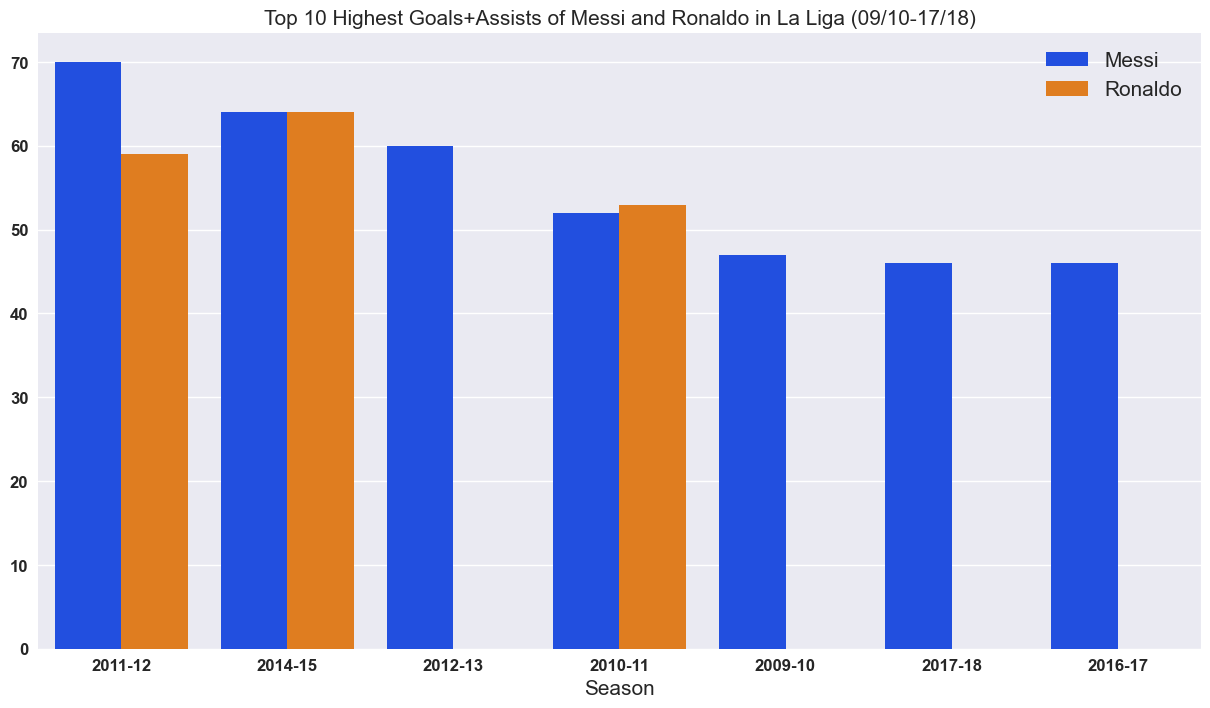

In [507]:
plt.figure(figsize=(15,8))
sns.barplot(data=Top10,y='G+A_Liga',x='Season',hue='Player',palette='bright')
plt.title('Top 10 Highest Goals+Assists of Messi and Ronaldo in La Liga (09/10-17/18)',fontsize=15)
plt.legend(loc='upper right',fontsize=15)
plt.ylabel('')
plt.xlabel('Season',fontsize=15)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.show()

I looked at Messi, and Ronaldo's best individual performances in terms of Goals+Assists in La Liga ranked them in descending order and limited it to 10. Seven seasons of Messi made it into the top 10, while only three seasons of Ronaldo made it into the top 10.

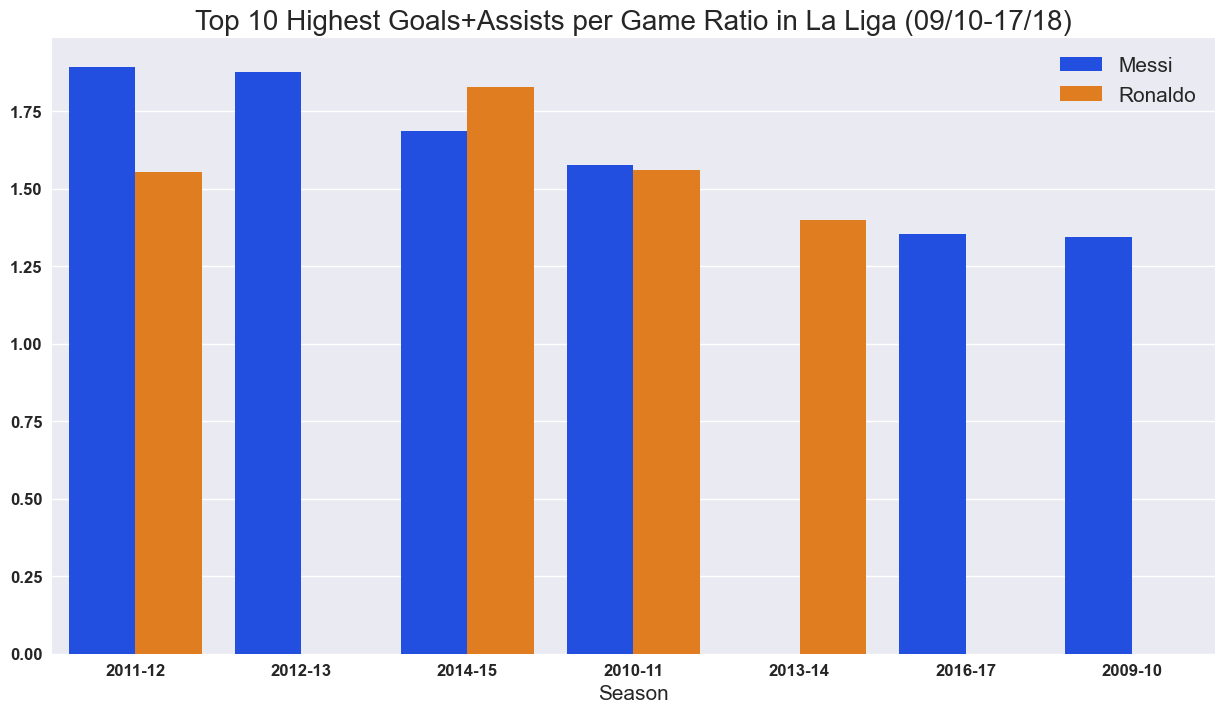

In [508]:
plt.figure(figsize=(15,8))
sns.barplot(data=Best,y='G+A/Games_Liga',x='Season',hue='Player',palette='bright')
plt.title('Top 10 Highest Goals+Assists per Game Ratio in La Liga (09/10-17/18)',fontsize=20)
plt.legend(loc='upper right',fontsize=15)
plt.ylabel('')
plt.xlabel('Season',fontsize=15)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.show()

 I looked at the ten highest Goals+Assists per Game Ratios between Messi and Ronaldo, ranked them in descending order and used the first ten Ratios. 
Messi made it six times into the top ten, and Ronaldo made it four times. Using the Ratio made it more balanced between Ronaldo and Messi. 

In [431]:
Stats['G+A_Champ']= Stats['CL_Goals']+Stats['CL_Asts']


,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,La_Liga,G+A_Liga,G+A/Games_Liga,Total_G+A,G+A_Champ
17,2009-10,Ronaldo,26,11,29,2462,7,2,6,450,0,0,0,37,1.275862,46,9
16,2009-10,Messi,34,13,35,2841,8,0,11,985,1,0,1,47,1.342857,55,8
15,2010-11,Ronaldo,40,13,34,2914,6,4,12,1018,0,0,0,53,1.558824,63,10
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,1,1,1,52,1.575758,68,16
13,2011-12,Ronaldo,46,13,38,3353,10,4,10,930,0,0,1,59,1.552632,73,14
12,2011-12,Messi,50,20,37,3270,14,9,11,990,1,0,0,70,1.891892,93,23
11,2012-13,Ronaldo,34,11,34,2716,12,1,12,1080,1,0,0,45,1.323529,58,13
10,2012-13,Messi,46,14,32,2629,8,3,11,827,0,0,1,60,1.875000,71,11
8,2013-14,Messi,28,12,31,2498,8,1,7,630,0,0,0,40,1.290323,49,9
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991,1,1,0,42,1.400000,65,23


In [436]:
Best_Champions = Stats.sort_values('G+A_Champ',ascending=False).head(10)
Best_Champions

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,La_Liga,G+A_Liga,G+A/Games_Liga,Total_G+A,G+A_Champ
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991,1,1,0,42,1.400000,65,23
12,2011-12,Messi,50,20,37,3270,14,9,11,990,1,0,0,70,1.891892,93,23
5,2015-16,Ronaldo,35,11,36,3184,16,4,12,1109,1,1,0,46,1.277778,66,20
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,0,1,0,31,1.148148,49,18
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,1,1,1,31,1.068966,48,17
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,1,1,1,52,1.575758,68,16
6,2014-15,Messi,43,21,38,3375,10,6,13,1145,1,1,1,64,1.684211,80,16
13,2011-12,Ronaldo,46,13,38,3353,10,4,10,930,0,0,1,59,1.552632,73,14
7,2014-15,Ronaldo,48,16,35,3096,10,4,12,1064,0,0,0,64,1.828571,78,14
11,2012-13,Ronaldo,34,11,34,2716,12,1,12,1080,1,0,0,45,1.323529,58,13


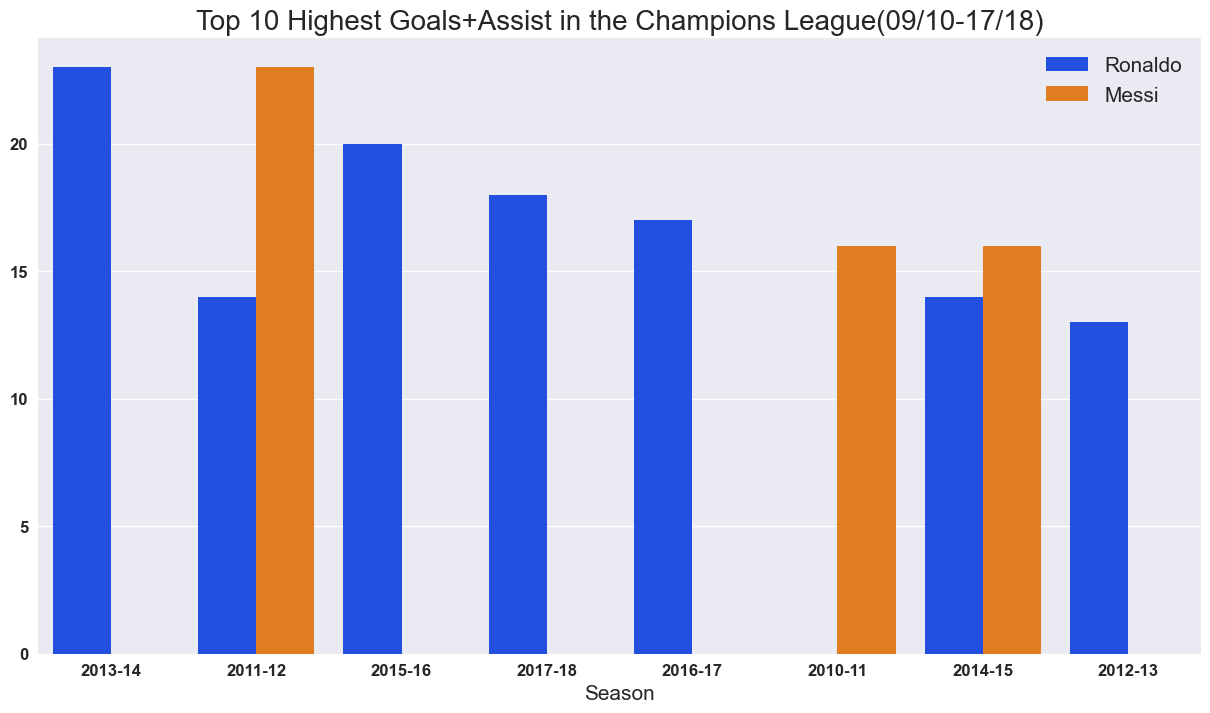

In [509]:
plt.figure(figsize=(15,8))
sns.barplot(data=Best_Champions,y='G+A_Champ',x='Season',hue='Player',palette='bright')
plt.title('Top 10 Highest Goals+Assist in the Champions League(09/10-17/18)',fontsize=20)
plt.legend(loc='upper right',fontsize=15)
plt.ylabel('')
plt.xlabel('Season',fontsize=15)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.show()

I added the assists and goals in the champions league, ranked them from highest to lowest, and made a top ten list. Ronaldo made it into the top ten in seven seasons, while Messi only made it three times in the top ten. 

In [320]:
Best_Seaon=Stats[(Stats["Ballon d'or"]==1)& (Stats["Champions_League"]==1) &(Stats["La_Liga"]==1)]
Best_Seaon

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,La_Liga,G+A_Liga,G+A/Games_Liga
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,1,1,1,52,1.575758
6,2014-15,Messi,43,21,38,3375,10,6,13,1145,1,1,1,64,1.684211
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,1,1,1,31,1.068966


Messi won the Ballon d'Or, Champions League and La Liga in two seasons. Ronaldo did one time in the season 2017/17.

In [325]:
Average = Stats.groupby('Player').mean()
Average

,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Ballon d'or,Champions_League,La_Liga,G+A_Liga,G+A/Games_Liga
Player,,,,,,,,,,,,,
Messi,36.555556,15.333333,34.333333,2892.444444,9.222222,3.111111,10.222222,872.222222,0.444444,0.222222,0.666667,51.888889,1.507054
Ronaldo,34.555556,10.777778,32.444444,2789.222222,11.666667,3.666667,11.222222,1001.333333,0.444444,0.444444,0.222222,45.333333,1.381590


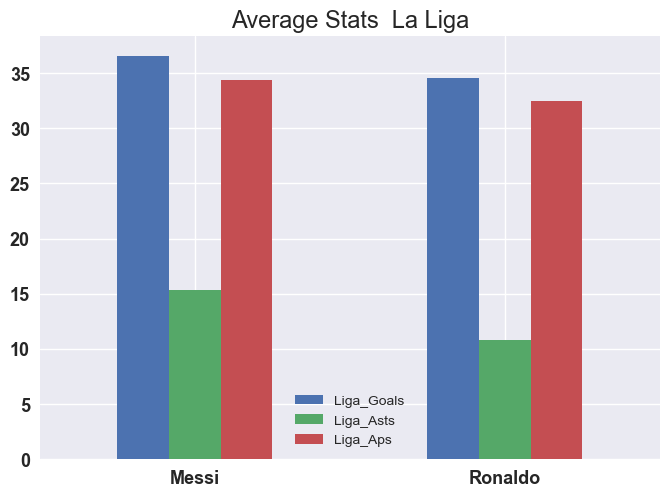

In [511]:
Average.iloc[:,0:3].plot.bar()
plt.title('Average Stats  La Liga',fontsize=17)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0,weight='bold',fontsize=13)
plt.yticks(weight='bold',fontsize=13)
plt.show()

The graph shows us the average number of goals, assists, and games played by Messi and Ronaldo in La Liga. The performance of Messi and Ronaldo are nearly identical. Messi averaged more goals, provided more assists, and played more games on average than Ronaldo. Let's look at the Champions League.

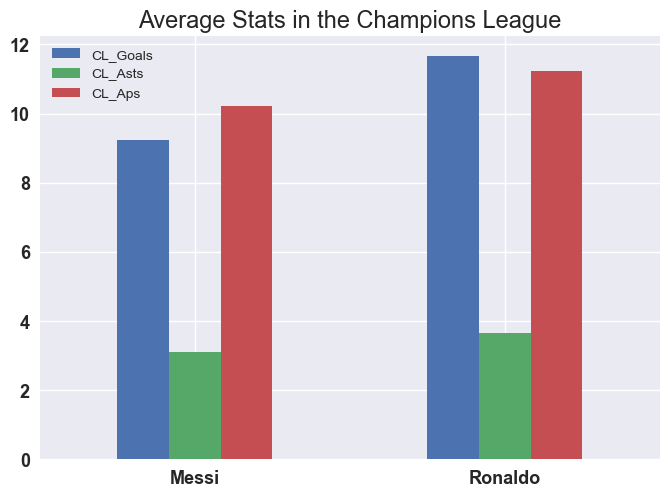

In [512]:
Average.iloc[:,4:7].plot.bar()
plt.title('Average Stats in the Champions League',fontsize=17)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0,weight='bold',fontsize=13)
plt.yticks(weight='bold',fontsize=13)
plt.show()

In the Champions League, Ronaldo scored, on average more goals, provided more assists and played more games.
Compared to La Liga, where you play 37 Games guaranteed if you're not injured, you only play six guaranteed games and need to advance in the tournament if you want to participate in more games. Ronaldo played more games in the Champions League, which means he and his team were more successful in advancing in the tournament than Messi's team. 
Overall, the performance was again very identical.

In [357]:
Average.iloc[:,4:7]

,CL_Goals,CL_Asts,CL_Aps
Player,,,
Messi,9.222222,3.111111,10.222222
Ronaldo,11.666667,3.666667,11.222222


# Messi and Ronaldo consistency in performance

In [381]:
Ronaldo = Stats[Stats['Player']== 'Ronaldo']

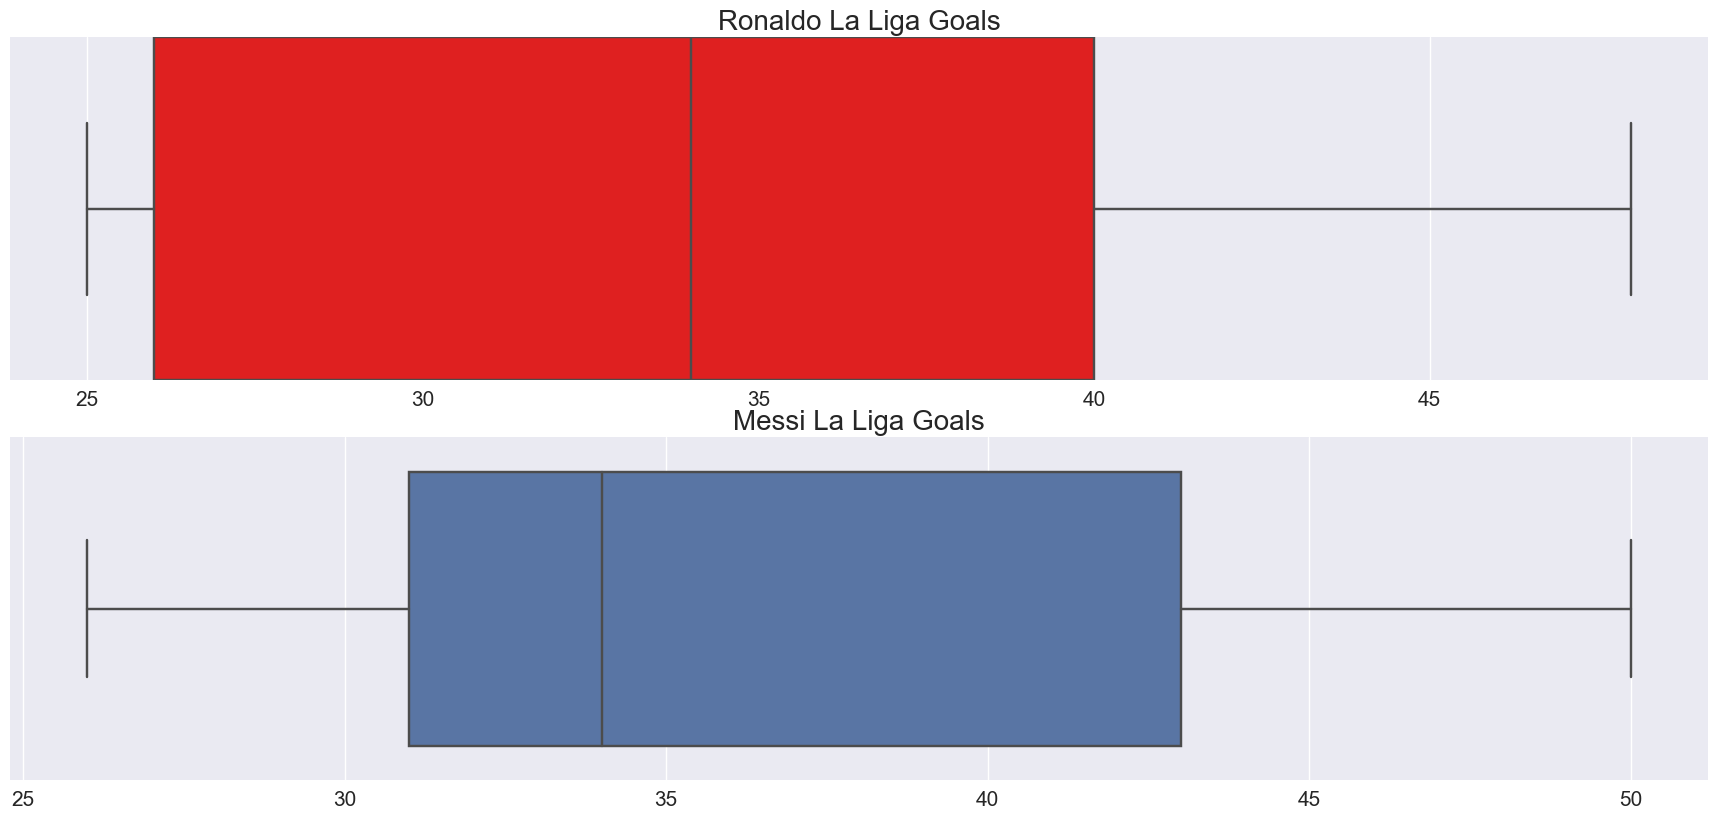

In [400]:
plt.figure(figsize=(17,8))
plt.subplot(2,1,1)
sns.boxplot(data=Ronaldo,x='Liga_Goals',color='red',width=1)
plt.title('Ronaldo La Liga Goals',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('')
plt.subplot(2,1,2)
sns.boxplot(data=Messi,x='Liga_Goals')
plt.title('Messi La Liga Goals',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('')

plt.tight_layout(pad=0)
plt.show()

Messi has a slightly lower standard deviation in La Liga Goals, which means he was more consistently hitting the same number of goals per season than Ronaldo in the League. 

In [382]:
Ronaldo.Liga_Goals.describe().T

count     9.000000
mean     34.555556
std       8.603940
min      25.000000
25%      26.000000
50%      34.000000
75%      40.000000
max      48.000000
Name: Liga_Goals, dtype: float64

In [482]:
Messi = Stats[Stats['Player']== 'Messi']
Messi.Liga_Goals.describe().T

count     9.000000
mean     36.555556
std       8.217529
min      26.000000
25%      31.000000
50%      34.000000
75%      43.000000
max      50.000000
Name: Liga_Goals, dtype: float64

In [484]:
Messi.Liga_Goals

16    34
14    31
12    50
10    46
8     28
6     43
4     26
2     37
0     34
Name: Liga_Goals, dtype: int64

Ronald's lowest number of goals was 25, he averaged 34 goals, and in his best season, he scored 48 goals in La Liga. In seven seasons, he scored at least 25 goals or more. In 2 seasons, he scored more than 43 goals. 

Messi's lowest number of gals in La Liga was 26, he averaged 36 goals, and in his best season, he scored 50 goals. In three seasons, he scored 43 or more goals. 
Messi's were a little better in La Liga.

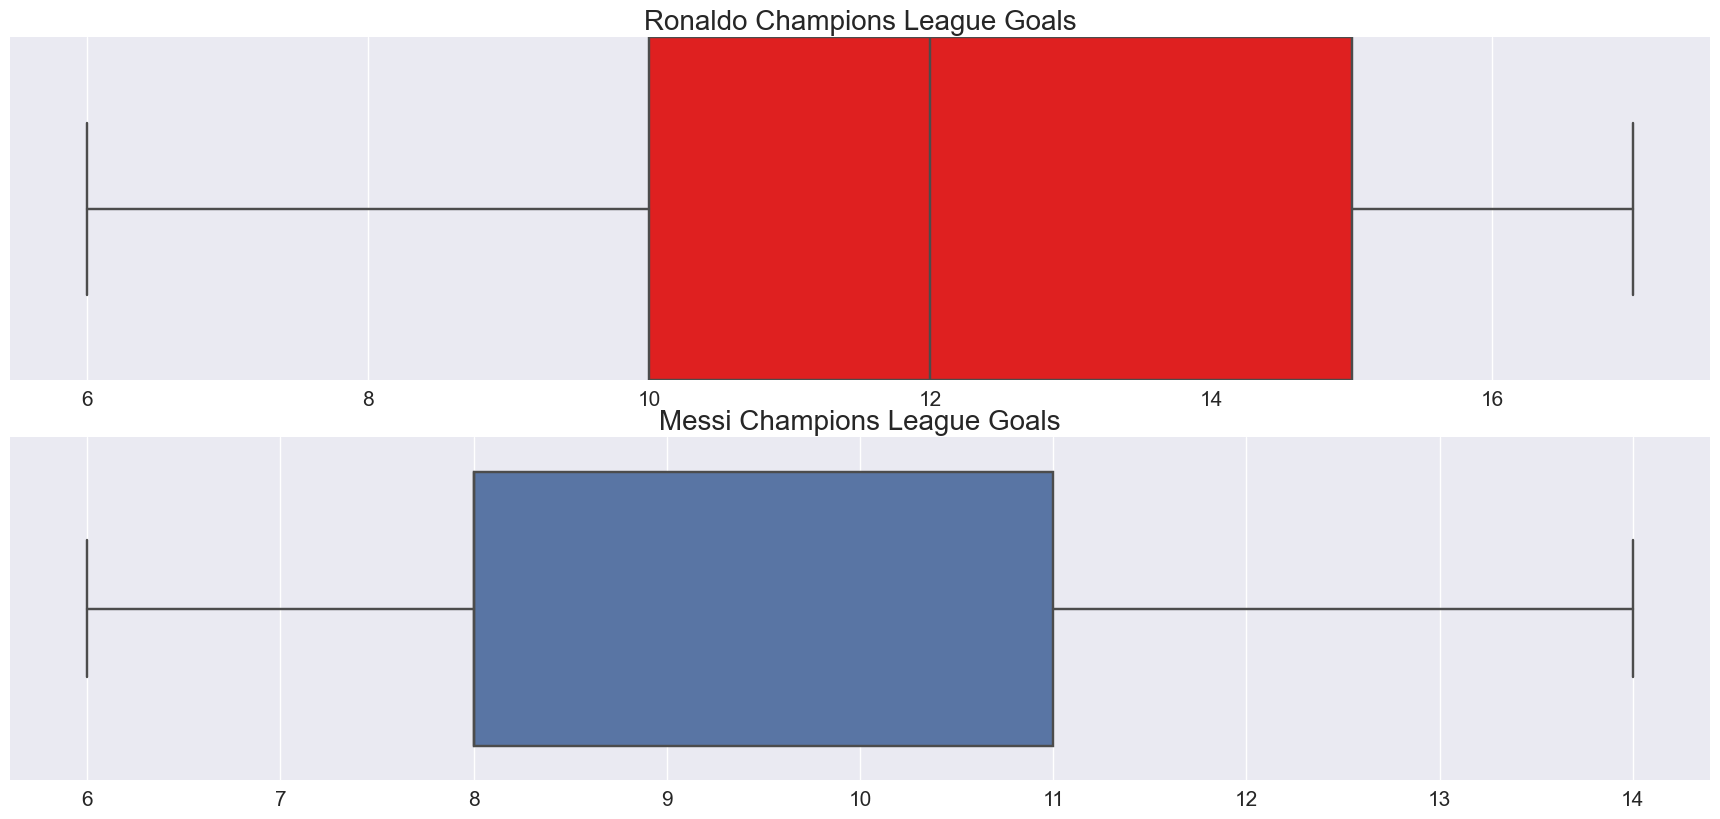

In [485]:
plt.figure(figsize=(17,8))
plt.subplot(2,1,1)
sns.boxplot(data=Ronaldo,x='CL_Goals',color='red',width=1)
plt.title('Ronaldo Champions League Goals',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('')
plt.subplot(2,1,2)
sns.boxplot(data=Messi,x='CL_Goals')
plt.title('Messi Champions League Goals',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('')

plt.tight_layout(pad=0)
plt.show()

In [402]:
Messi.CL_Goals.describe().T

count     9.000000
mean      9.222222
std       2.728451
min       6.000000
25%       8.000000
50%       8.000000
75%      11.000000
max      14.000000
Name: CL_Goals, dtype: float64

In [403]:
Ronaldo.CL_Goals.describe().T

count     9.000000
mean     11.666667
std       3.840573
min       6.000000
25%      10.000000
50%      12.000000
75%      15.000000
max      17.000000
Name: CL_Goals, dtype: float64

Ronaldo's highest number of goals in the Champions League was 17, he averaged around 11 goals, and his lowest number of goals was 6. 

Messi's highest number of goals in the Champions League was 14, he averaged around nine goals, and in his lowest season, he scored six goals. Overall, Ronaldo is the better Champions League Player.

Messi has a lower standard deviation, meaning he was more consistent than Ronaldo when it came to scoring 
the same number of goals every season. 

# Let's Compare their total performance Champions League + La Liga

In [420]:
Stats['Total_G+A']= Stats['G+A_Liga']+Stats.CL_Goals+Stats.CL_Asts

In [429]:
Top10_Total=Stats.sort_values(by='Total_G+A',ascending=False)[['Season','Player','Total_G+A',"Ballon d'or",'Champions_League','La_Liga']].head(10)
Top10_Total

,Season,Player,Total_G+A,Ballon d'or,Champions_League,La_Liga
12,2011-12,Messi,93,1,0,0
6,2014-15,Messi,80,1,1,1
7,2014-15,Ronaldo,78,0,0,0
13,2011-12,Ronaldo,73,0,0,1
10,2012-13,Messi,71,0,0,1
14,2010-11,Messi,68,1,1,1
5,2015-16,Ronaldo,66,1,1,0
9,2013-14,Ronaldo,65,1,1,0
15,2010-11,Ronaldo,63,0,0,0
2,2016-17,Messi,59,0,0,0


I computed the Total Goals + Assists across the Champions League and La Liga from 2009/10 to 2017/18.
I ranked the performance from highest to lowest and chose the ten highest. 

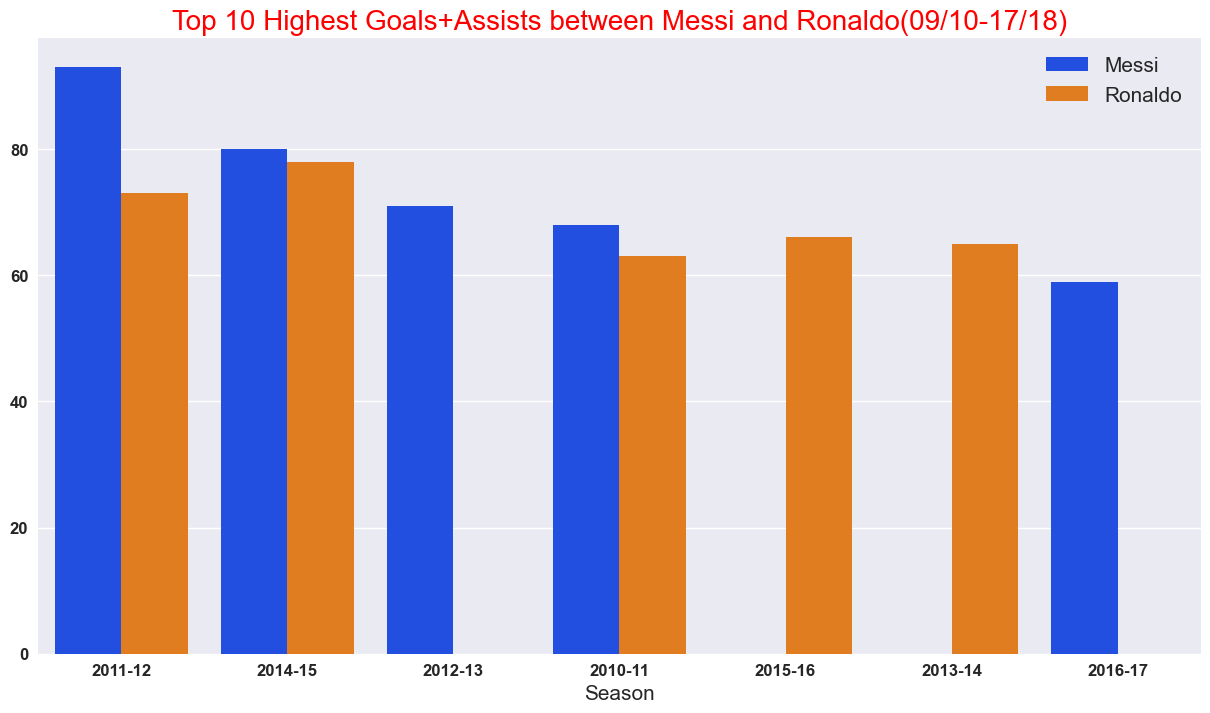

In [514]:
plt.figure(figsize=(15,8))
sns.barplot(data=Top10_Total,y='Total_G+A',x='Season',hue='Player',palette='bright')
plt.title('Top 10 Highest Goals+Assists between Messi and Ronaldo(09/10-17/18)',fontsize=20,color='red')
plt.legend(loc='upper right',fontsize=15)
plt.ylabel('')
plt.xlabel('Season',fontsize=15)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.show()

Messi holds the number one spot with 93 scorer points and the number two spot with 80 scorer points. Overall if we combine both competitions, we get a more balanced result. We have 5 top performances of Ronaldo and 5 top performances of Messi in our top ten. Based on only the data that we worked with. Messi outperforms Ronaldo by a small margin.